# What makes people happy? Can you find Dytopia?

The `World Happiness Report` is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. Over the last year’s, `World Happiness Report` focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.

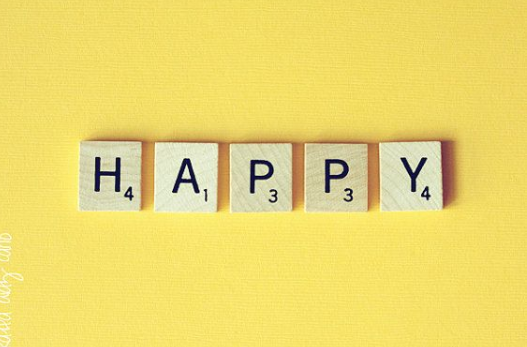


**Dataset information**

    The information in the datasets is based on answers to the most life evaluation address inquired within the survey. This address, known as the Cantril step, asks respondents to think of a step with the most excellent conceivable life for them being a 10 and the most exceedingly bad conceivable life being a and to rate their claim current lives on that scale. 


The Happiness Score is explained by the following factors:

- `Overall rank`: happiness rank of the different countries
- `Country o region`
- `Score`:  is a national average of the responses to the main life evaluation question asked in the Gallup World Poll (GWP), which uses the Cantril Ladder. Ranges from [0-10]
- `GDP per capita`
- `Healthy Life Expectancy`: score that goes from [0-1], being 1 the ones that have more confidence in terms of healthy life
- `Social support`: it indicates how people are appreciating the social support by governments, and it that ranges from [0-2]
- `Freedom to make life choices` score that ranges from 0 to 1, being 1 the ones that feel more free
- `Generosity`:score that ranges from 0 to 1, being 1 the ones that feel more generosity 
- `Perceptions of corruption`: perception of corruption on the country that it goes from  0 to 1. The higher this value is the lower perception of corruption 
- `year`  


>dataset: `Ex2.2._Happiness-Score.csv`

In [1]:
!pip install plotly

In [2]:
!pip install wordcloud

In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from wordcloud import WordCloud
import plotly.express as px
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Exercise 1.Tell a story with your dataset, to try to answer the following question:

"Which factors are more important to live a happier life? As a result, people and countries can focus on the more significant factors to achieve a higher happiness level "

# To achieve this goal use the different funcionalities from 
# the visualization libraries that you have seen in the module

'Which factors are more important to live a happier life? As a result, people and countries can focus on the more significant factors to achieve a higher happiness level '

In [5]:
missing_values = ['/','na','nul','null','-','?']
data = pd.read_csv('Ex2.2._Happiness-Score.csv', na_values = missing_values)
data.head()

Unnamed: 0  Unnamed: 0.1  Overall rank Country or region  Score  \
0           0             0             1           Finland  7.632   
1           1             1             2            Norway  7.594   
2           2             2             3           Denmark  7.555   
3           3             3             4           Iceland  7.495   
4           4             4             5       Switzerland  7.487   

   GDP per capita  Social support  Healthy life expectancy  \
0           1.305           1.592                      NaN   
1           1.456           1.582                      NaN   
2           1.351           1.590                      NaN   
3           1.343           1.644                      NaN   
4           1.420           1.549                      NaN   

   Freedom to make life choices  Generosity  Perceptions of corruption  year  
0                         0.681       0.202                      0.393  2018  
1                         0.686       0.286                      0.340  2018  
2                         0.683       0.284                      0.408  2018  
3                         0.677       0.353                      0.138  2018  
4                         0.660       0.256                      0.357  2018

In [6]:
df = data.copy()
df

Unnamed: 0  Unnamed: 0.1  Overall rank         Country or region  Score  \
0             0             0             1                   Finland  7.632   
1             1             1             2                    Norway  7.594   
2             2             2             3                   Denmark  7.555   
3             3             3             4                   Iceland  7.495   
4             4             4             5               Switzerland  7.487   
..          ...           ...           ...                       ...    ...   
307         307           151           152                    Rwanda  3.334   
308         308           152           153                  Tanzania  3.231   
309         309           153           154               Afghanistan  3.203   
310         310           154           155  Central African Republic  3.083   
311         311           155           156               South Sudan  2.853   

     GDP per capita  Social support  Healthy life expectancy  \
0             1.305           1.592                      NaN   
1             1.456           1.582                      NaN   
2             1.351           1.590                      NaN   
3             1.343           1.644                      NaN   
4             1.420           1.549                      NaN   
..              ...             ...                      ...   
307           0.359           0.711                      NaN   
308           0.476           0.885                      NaN   
309           0.350           0.517                      NaN   
310           0.026           0.000                      NaN   
311           0.306           0.575                      NaN   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
0                           0.681       0.202                      0.393  2018  
1                           0.686       0.286                      0.340  2018  
2                           0.683       0.284                      0.408  2018  
3                           0.677       0.353                      0.138  2018  
4                           0.660       0.256                      0.357  2018  
..                            ...         ...                        ...   ...  
307                         0.555       0.217                      0.411  2019  
308                         0.417       0.276                      0.147  2019  
309                         0.000       0.158                      0.025  2019  
310                         0.225       0.235                      0.035  2019  
311                         0.010       0.202                      0.091  2019  

[312 rows x 12 columns]

In [7]:
df.isin(['?']).sum()

Unnamed: 0                      0
Unnamed: 0.1                    0
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
year                            0
dtype: int64

In [8]:
data.shape
df.shape

(312, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    312 non-null    int64  
 1   Unnamed: 0.1                  312 non-null    int64  
 2   Overall rank                  312 non-null    int64  
 3   Country or region             312 non-null    object 
 4   Score                         312 non-null    float64
 5   GDP per capita                312 non-null    float64
 6   Social support                312 non-null    float64
 7   Healthy life expectancy       7 non-null      float64
 8   Freedom to make life choices  312 non-null    float64
 9   Generosity                    312 non-null    float64
 10  Perceptions of corruption     311 non-null    float64
 11  year                          312 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 29.4+ KB


In [10]:
df.duplicated().sum()

0

In [11]:
df = df.drop_duplicates()

In [12]:
df.isnull().sum()/len(df)*100

Unnamed: 0                       0.000000
Unnamed: 0.1                     0.000000
Overall rank                     0.000000
Country or region                0.000000
Score                            0.000000
GDP per capita                   0.000000
Social support                   0.000000
Healthy life expectancy         97.756410
Freedom to make life choices     0.000000
Generosity                       0.000000
Perceptions of corruption        0.320513
year                             0.000000
dtype: float64

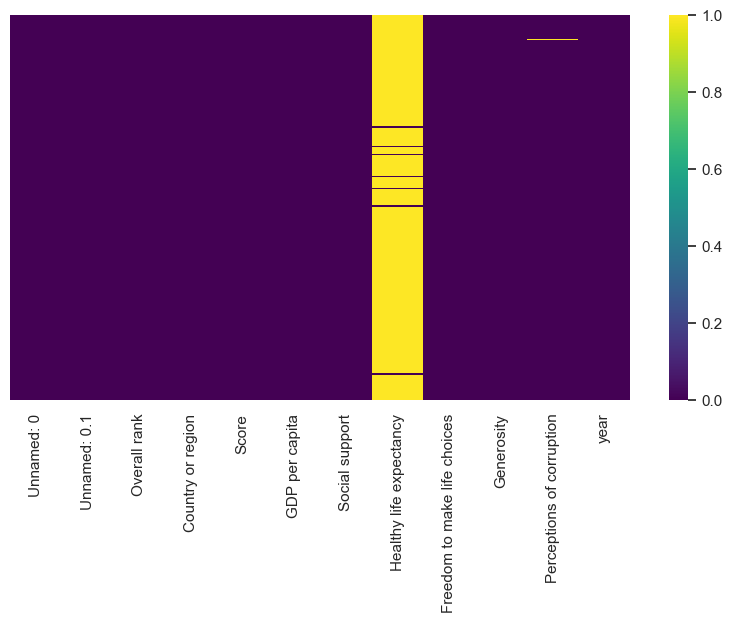

In [13]:
sns.set(rc={'figure.figsize':(10, 5)})

sns.heatmap(df.isna(),cmap='viridis', yticklabels=False)
plt.show()

In [14]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('Unnamed: 0.1', axis=1, inplace=True)
df.drop('Healthy life expectancy', axis=1, inplace=True)

In [15]:
df = df.fillna(df.median())

In [16]:
df['Perceptions of corruption'].isnull().sum()

0

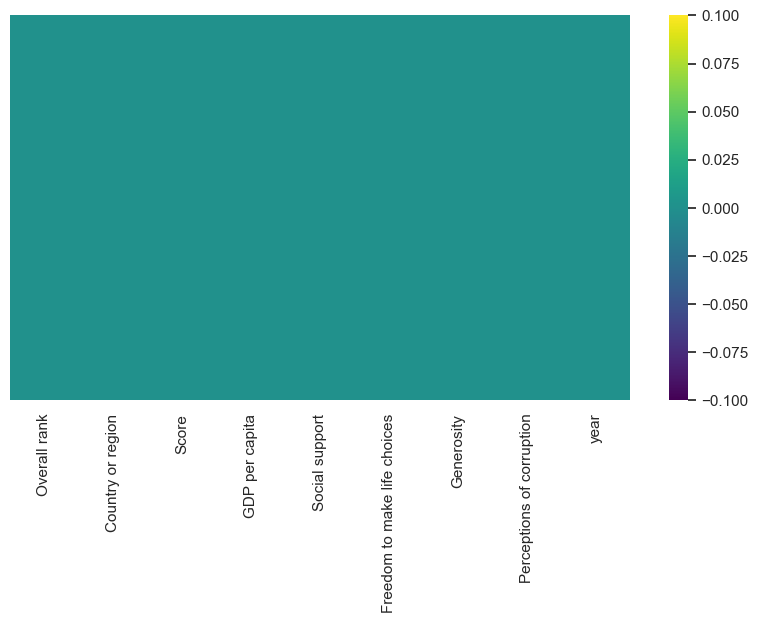

In [17]:
sns.set(rc={'figure.figsize':(10, 5)})

sns.heatmap(df.isna(),cmap='viridis', yticklabels=False)
plt.show()

In [18]:
df.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Freedom to make life choices  Generosity  Perceptions of corruption  year  
0                         0.681       0.202                      0.393  2018  
1                         0.686       0.286                      0.340  2018  
2                         0.683       0.284                      0.408  2018  
3                         0.677       0.353                      0.138  2018  
4                         0.660       0.256                      0.357  2018

In [19]:
import sys
sys.path.insert(0, 'Functions_EDA.py')

from Functions_EDA import *

In [20]:
df['year'].unique()

array([2018, 2019], dtype=int64)

In [21]:
df['year'].value_counts()

2018    156
2019    156
Name: year, dtype: int64

In [22]:
y_2018 = df[df['year'] == 2018]
y_2018

Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.632           1.305   
1               2                    Norway  7.594           1.456   
2               3                   Denmark  7.555           1.351   
3               4                   Iceland  7.495           1.343   
4               5               Switzerland  7.487           1.420   
..            ...                       ...    ...             ...   
151           152                     Yemen  3.355           0.442   
152           153                  Tanzania  3.303           0.455   
153           154               South Sudan  3.254           0.337   
154           155  Central African Republic  3.083           0.024   
155           156                   Burundi  2.905           0.091   

     Social support  Freedom to make life choices  Generosity  \
0             1.592                         0.681       0.202   
1             1.582                         0.686       0.286   
2             1.590                         0.683       0.284   
3             1.644                         0.677       0.353   
4             1.549                         0.660       0.256   
..              ...                           ...         ...   
151           1.073                         0.244       0.083   
152           0.991                         0.481       0.270   
153           0.608                         0.112       0.224   
154           0.000                         0.305       0.218   
155           0.627                         0.065       0.149   

     Perceptions of corruption  year  
0                        0.393  2018  
1                        0.340  2018  
2                        0.408  2018  
3                        0.138  2018  
4                        0.357  2018  
..                         ...   ...  
151                      0.064  2018  
152                      0.097  2018  
153                      0.106  2018  
154                      0.038  2018  
155                      0.076  2018  

[156 rows x 9 columns]

Let's analyze the year 2018.

<AxesSubplot:>

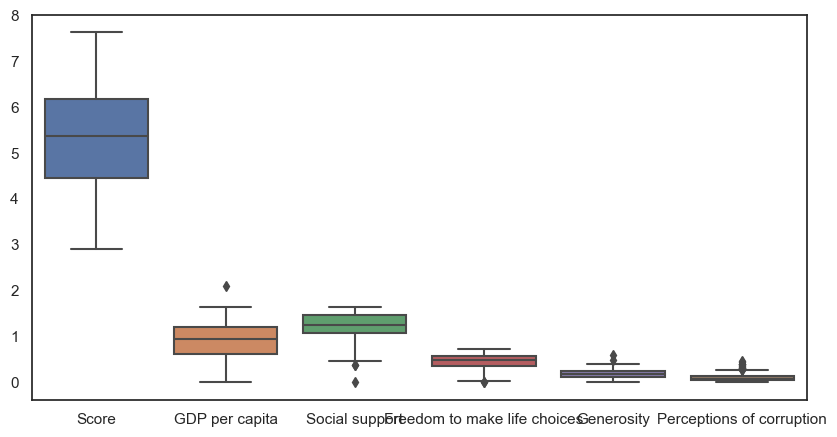

In [24]:
sns.boxplot(data = y_2018.loc[:, ['Score','GDP per capita','Social support','Freedom to make life choices','Generosity', 'Perceptions of corruption']])


In [25]:
OutLiersBox(y_2018, 'Score')

In [26]:
OutLiersBox(y_2018, 'GDP per capita')

In [27]:
outliers_GDP_2018 = y_2018[y_2018['GDP per capita'] > 1.649]
outliers_GDP_2018

Overall rank     Country or region  Score  GDP per capita  Social support  \
19            20  United Arab Emirates  6.774           2.096           0.776   

    Freedom to make life choices  Generosity  Perceptions of corruption  year  
19                         0.284       0.186                      0.082  2018

In [28]:
px.bar(outliers_GDP_2018, x = 'Country or region', y = ['GDP per capita', 'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Outliers in GDP per capita in 2018',
      barmode = 'group')

We can see that United Arab Emirates, although it has a high GDP per capita score, scored really low in the rest of the variables.

In [29]:
OutLiersBox(y_2018, 'Social support')

In [79]:
outliers_social_support_2018 = y_2018[y_2018['Social support'] < 0.474]
outliers_social_support_2018

Overall rank         Country or region  Score  GDP per capita  \
135           136                     Benin  4.141           0.378   
149           150                     Syria  3.462           0.689   
154           155  Central African Republic  3.083           0.024   

     Social support  Freedom to make life choices  Generosity  \
135           0.372                         0.440       0.163   
149           0.382                         0.088       0.376   
154           0.000                         0.305       0.218   

     Perceptions of corruption  year  
135                      0.067  2018  
149                      0.144  2018  
154                      0.038  2018

In [80]:
fig = px.bar(outliers_social_support_2018, x = 'Country or region', y = ['GDP per capita', 'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Outliers in social support in 2018',
      barmode = 'group')
fig.show()

Benin, Syria, and the Central African Republic scored really low in social support. Benin scored low in GDP per capita as well, Syria scored high in GDP per capita, whereas we don't have any score for the GDP per capita in the Central African Republic.

In [33]:
OutLiersBox(y_2018, 'Freedom to make life choices')

In [83]:
outliers_freedom_2018 = y_2018[y_2018['Freedom to make life choices'] < 0.025]
outliers_freedom_2018

Overall rank Country or region  Score  GDP per capita  Social support  \
136           137             Sudan  4.139           0.605           1.240   
141           142            Angola  3.795           0.730           1.125   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
136                         0.016       0.134                      0.082  2018  
141                         0.000       0.079                      0.061  2018

In [84]:
fig = px.bar(outliers_freedom_2018, x = 'Country or region', y = ['GDP per capita', 'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Outliers in freedom to make life choices in 2018',
      barmode = 'group')
fig.show()

We can see that Sudan scored extremely low in freedom to make life choices, whereas we don't have any score for Angola.

In [85]:
OutLiersBox(y_2018, 'Generosity')

In [86]:
outliers_generosity_2018 = y_2018[y_2018['Generosity'] > 0.392]
outliers_generosity_2018

Overall rank Country or region  Score  GDP per capita  Social support  \
95             96         Indonesia  5.093           0.899           1.215   
129           130           Myanmar  4.308           0.682           1.174   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
95                          0.538       0.484                      0.018  2018  
129                         0.580       0.598                      0.178  2018

In [88]:
fig = px.bar(outliers_generosity_2018, x = 'Country or region', y = ['GDP per capita', 'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Outliers in generosity in 2018',
      barmode = 'group')
fig.show()

Both Indonesia and Myammar scored high in generosity and they also scored pretty high in social support as well. However, they scored low in GDP per capita and extremely low in perceptions of corruption.

In [103]:
OutLiersBox(y_2018, 'Perceptions of corruption')

In [104]:
outliers_corruption_2018 = y_2018[y_2018['Perceptions of corruption'] > 0.259]
outliers_corruption_2018

Overall rank Country or region  Score  GDP per capita  Social support  \
0               1           Finland  7.632           1.305           1.592   
1               2            Norway  7.594           1.456           1.582   
2               3           Denmark  7.555           1.351           1.590   
4               5       Switzerland  7.487           1.420           1.549   
5               6       Netherlands  7.441           1.361           1.488   
6               7            Canada  7.328           1.330           1.532   
7               8       New Zealand  7.324           1.268           1.601   
8               9            Sweden  7.314           1.355           1.501   
9              10         Australia  7.272           1.340           1.573   
13             14           Ireland  6.977           1.448           1.583   
14             15           Germany  6.965           1.340           1.474   
16             17        Luxembourg  6.910           1.576           1.520   
18             19            Israel  6.814           1.301           1.559   
33             34         Singapore  6.343           1.529           1.451   
75             76         Hong Kong  5.430           1.405           1.290   
97             98           Somalia  4.982           0.000           0.712   
150           151            Rwanda  3.408           0.332           0.896   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
0                           0.681       0.202                      0.393  2018  
1                           0.686       0.286                      0.340  2018  
2                           0.683       0.284                      0.408  2018  
4                           0.660       0.256                      0.357  2018  
5                           0.638       0.333                      0.295  2018  
6                           0.653       0.321                      0.291  2018  
7                           0.669       0.365                      0.389  2018  
8                           0.659       0.285                      0.383  2018  
9                           0.647       0.361                      0.302  2018  
13                          0.614       0.307                      0.306  2018  
14                          0.586       0.273                      0.280  2018  
16                          0.632       0.196                      0.321  2018  
18                          0.533       0.354                      0.272  2018  
33                          0.631       0.261                      0.457  2018  
75                          0.524       0.246                      0.291  2018  
97                          0.674       0.238                      0.282  2018  
150                         0.636       0.200                      0.444  2018

In [106]:
fig = px.bar(outliers_corruption_2018, x = 'Country or region', y = ['GDP per capita', 'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Outliers in perceptions of corruption in 2018',
      barmode = 'group')
fig.show()

These are the countries which had a high score in perceptions of corruption in 2018, meaning that corruption was less perceived in these countries. Most of them scored high in GDP per capita and social support, with a few exceptions. Let's verify.

In [135]:
outliers_corruption_2018 = outliers_corruption_2018.sort_values(by='Score',ascending=False)
outliers_corruption_2018

Overall rank Country or region  Score  GDP per capita  Social support  \
0               1           Finland  7.632           1.305           1.592   
1               2            Norway  7.594           1.456           1.582   
2               3           Denmark  7.555           1.351           1.590   
4               5       Switzerland  7.487           1.420           1.549   
5               6       Netherlands  7.441           1.361           1.488   
6               7            Canada  7.328           1.330           1.532   
7               8       New Zealand  7.324           1.268           1.601   
8               9            Sweden  7.314           1.355           1.501   
9              10         Australia  7.272           1.340           1.573   
13             14           Ireland  6.977           1.448           1.583   
14             15           Germany  6.965           1.340           1.474   
16             17        Luxembourg  6.910           1.576           1.520   
18             19            Israel  6.814           1.301           1.559   
33             34         Singapore  6.343           1.529           1.451   
75             76         Hong Kong  5.430           1.405           1.290   
97             98           Somalia  4.982           0.000           0.712   
150           151            Rwanda  3.408           0.332           0.896   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
0                           0.681       0.202                      0.393  2018  
1                           0.686       0.286                      0.340  2018  
2                           0.683       0.284                      0.408  2018  
4                           0.660       0.256                      0.357  2018  
5                           0.638       0.333                      0.295  2018  
6                           0.653       0.321                      0.291  2018  
7                           0.669       0.365                      0.389  2018  
8                           0.659       0.285                      0.383  2018  
9                           0.647       0.361                      0.302  2018  
13                          0.614       0.307                      0.306  2018  
14                          0.586       0.273                      0.280  2018  
16                          0.632       0.196                      0.321  2018  
18                          0.533       0.354                      0.272  2018  
33                          0.631       0.261                      0.457  2018  
75                          0.524       0.246                      0.291  2018  
97                          0.674       0.238                      0.282  2018  
150                         0.636       0.200                      0.444  2018

In [136]:
fig = px.bar(outliers_corruption_2018,x='Country or region',y='Score')
fig.show()

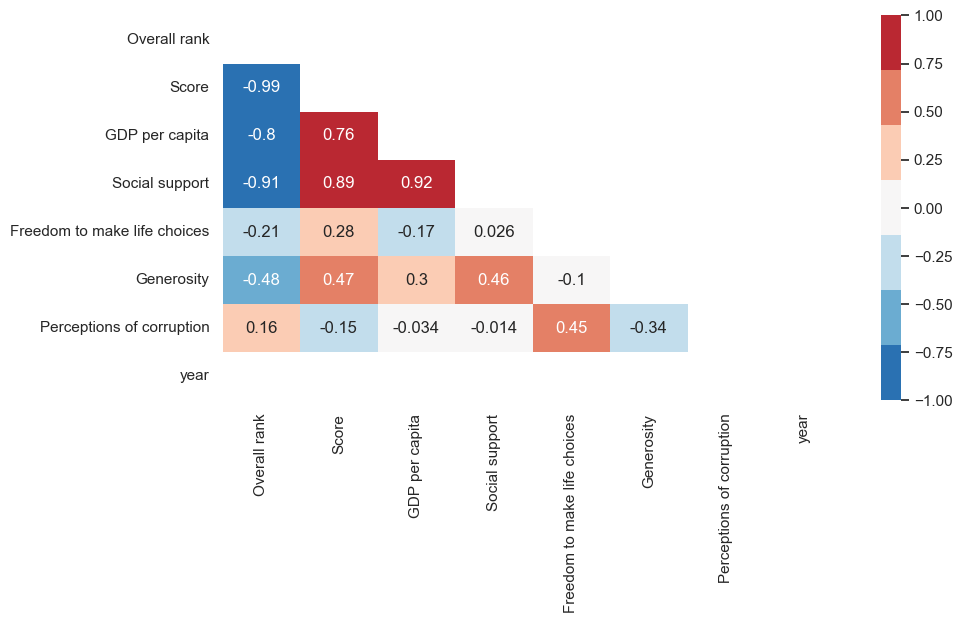

In [137]:
corrCoef_Threshold(outliers_corruption_2018)

From the first plot, we saw that most contries that constitute an outlier for perceptions of corruption in 2018 scored high in GDP per capita and social support. From the matrix, we can confirm that GDP per capita and social support have contributed to the total score for this countries. From the second bar plot, we can see a certain continuitiy whic starts to dicrease with Ireland and then drop with Singapore. Let's analyze those countries with a lower score but a high perception of corruption.

In [145]:
outliers_corruption_2018.loc[outliers_corruption_2018['Country or region'] == 'Ireland']

Overall rank Country or region  Score  GDP per capita  Social support  \
13            14           Ireland  6.977           1.448           1.583   

    Freedom to make life choices  Generosity  Perceptions of corruption  year  
13                         0.614       0.307                      0.306  2018

In [146]:
corruption_2018_toanalyze = outliers_corruption_2018.loc[outliers_corruption_2018['Score'] <= 6.977]
corruption_2018_toanalyze

Overall rank Country or region  Score  GDP per capita  Social support  \
13             14           Ireland  6.977           1.448           1.583   
14             15           Germany  6.965           1.340           1.474   
16             17        Luxembourg  6.910           1.576           1.520   
18             19            Israel  6.814           1.301           1.559   
33             34         Singapore  6.343           1.529           1.451   
75             76         Hong Kong  5.430           1.405           1.290   
97             98           Somalia  4.982           0.000           0.712   
150           151            Rwanda  3.408           0.332           0.896   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
13                          0.614       0.307                      0.306  2018  
14                          0.586       0.273                      0.280  2018  
16                          0.632       0.196                      0.321  2018  
18                          0.533       0.354                      0.272  2018  
33                          0.631       0.261                      0.457  2018  
75                          0.524       0.246                      0.291  2018  
97                          0.674       0.238                      0.282  2018  
150                         0.636       0.200                      0.444  2018

In [175]:
fig = px.bar(corruption_2018_toanalyze, x = 'Country or region', y = ['GDP per capita', 'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Outliers in perceptions of corruption in 2018 to analyze',
      barmode = 'group')
fig.show()

From this plot and from the table above, we can see that countries like Ireland, Germany, Luxembourg, and Israel scored quite high in GDP per capita and social support, which led them in the top 20 happiest countries. Israel and Hong Kong scored lower in freedom to make life choices, Luxembourg and Singapore scored low in generosity, Somalia didn't have any score for GDP per capita and scored really low in social support, whereas Rwanda scored extremely low in GDP per capita and social support.

Let's have a look at some correlations.

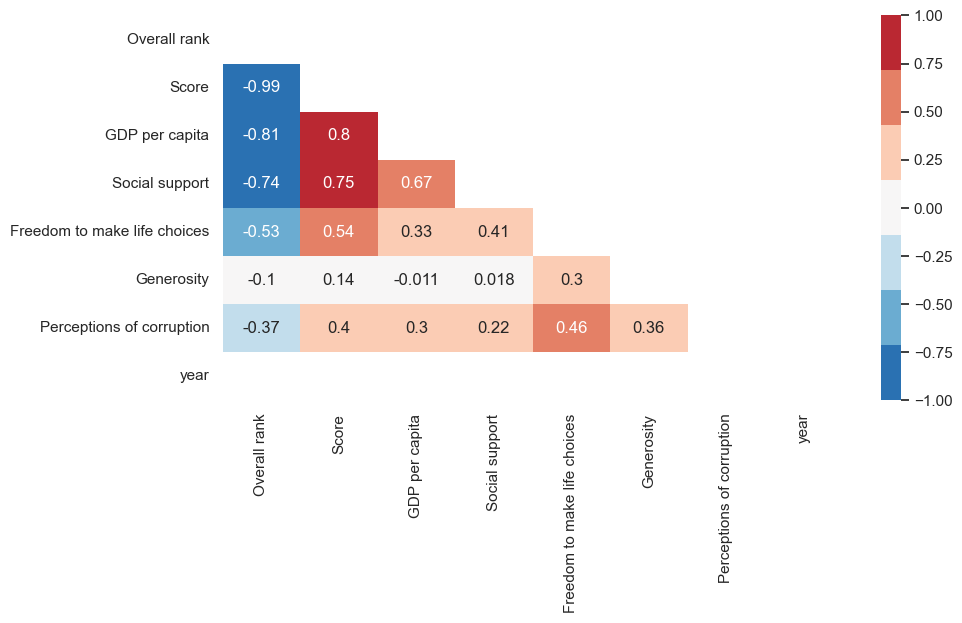

In [148]:
corrCoef_Threshold(y_2018)

From this matrix, it seems that in 2018 GDP per capita and social support had a higher impact on the overall happiness score. Freedom to make life choices seemd to have a moderate impact, followed by perceptions of corruption. Generosity barely had any impact on the overall happiness score. Let's have a closer look.

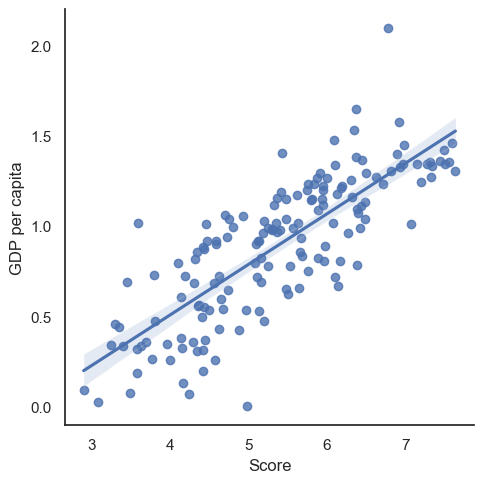

In [149]:
sns.lmplot(x='Score', y='GDP per capita', data=y_2018)

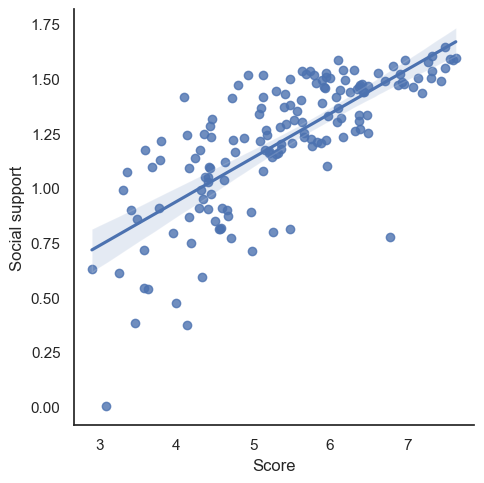

In [150]:
sns.lmplot(x='Score', y='Social support', data=y_2018)

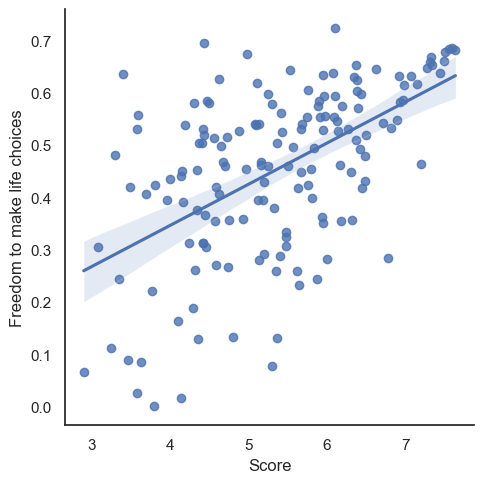

In [151]:
sns.lmplot(x='Score', y='Freedom to make life choices', data=y_2018)

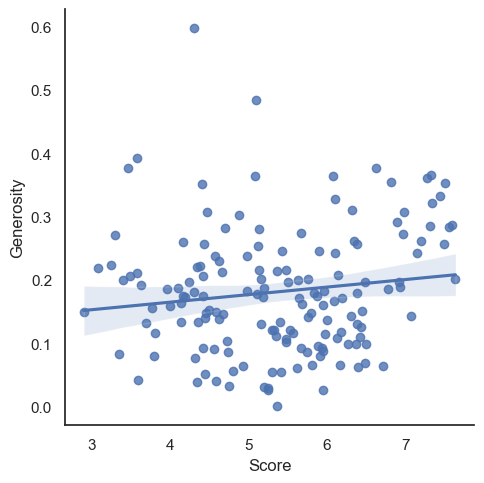

In [152]:
sns.lmplot(x='Score', y='Generosity', data=y_2018)

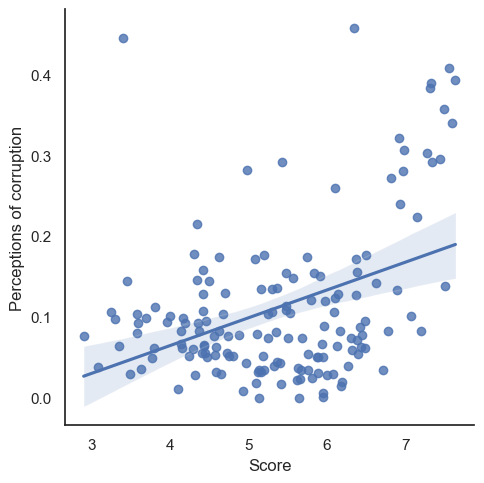

In [153]:
sns.lmplot(x='Score', y='Perceptions of corruption', data=y_2018)

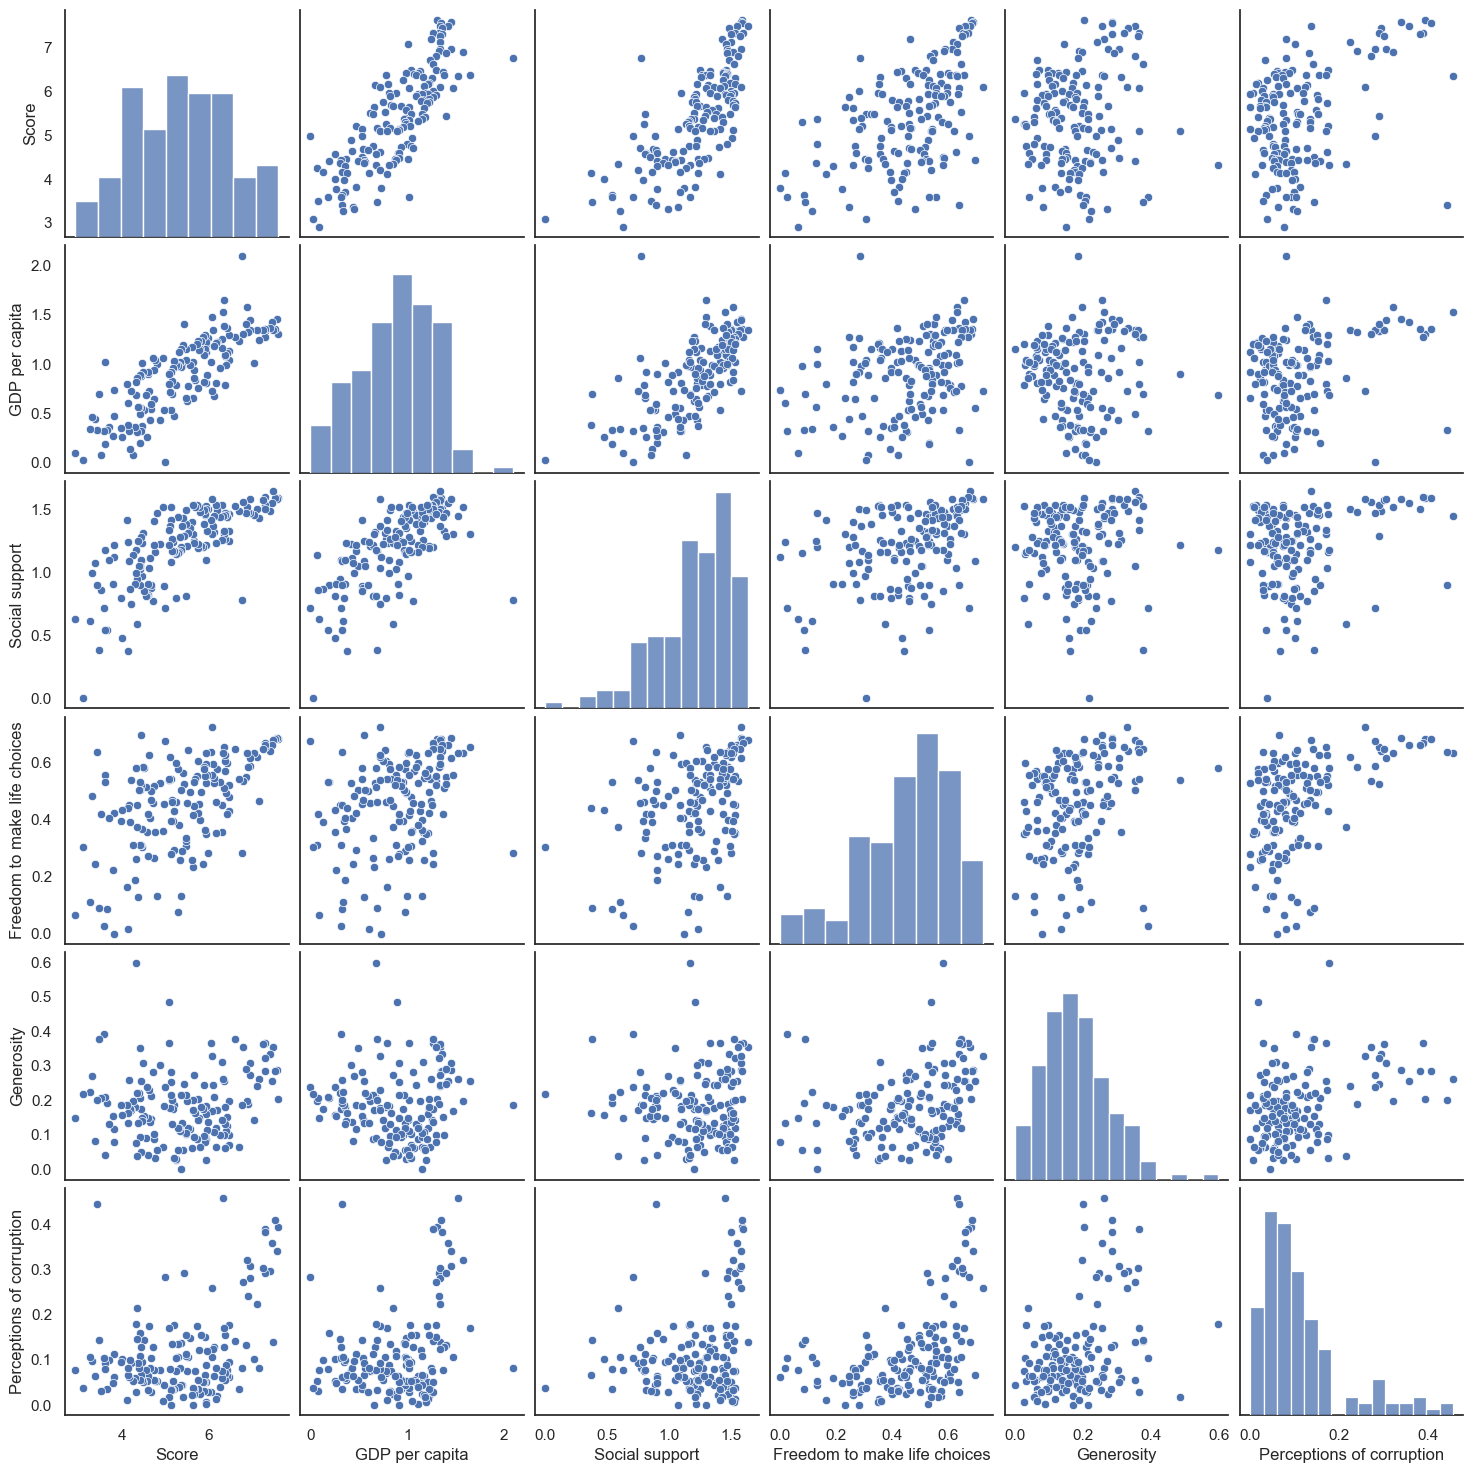

In [186]:
sns.pairplot(y_2018, vars = ['Score','GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'])

These scatter plots confirm what we found in the matrix: there is a positive correlation between the overall happiness score and GDP per capita, social suppport and freedom to make life choices and perceptions of corruption. GDP per capita and social support have the strongest correlation. Generosity barely had any impact.

Let's analyze 2019

In [154]:
y_2019 = df[df['year'] == 2019]
y_2019

Overall rank         Country or region  Score  GDP per capita  \
156             1                   Finland  7.769           1.340   
157             2                   Denmark  7.600           1.383   
158             3                    Norway  7.554           1.488   
159             4                   Iceland  7.494           1.380   
160             5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
307           152                    Rwanda  3.334           0.359   
308           153                  Tanzania  3.231           0.476   
309           154               Afghanistan  3.203           0.350   
310           155  Central African Republic  3.083           0.026   
311           156               South Sudan  2.853           0.306   

     Social support  Freedom to make life choices  Generosity  \
156           1.587                         0.596       0.153   
157           1.573                         0.592       0.252   
158           1.582                         0.603       0.271   
159           1.624                         0.591       0.354   
160           1.522                         0.557       0.322   
..              ...                           ...         ...   
307           0.711                         0.555       0.217   
308           0.885                         0.417       0.276   
309           0.517                         0.000       0.158   
310           0.000                         0.225       0.235   
311           0.575                         0.010       0.202   

     Perceptions of corruption  year  
156                      0.393  2019  
157                      0.410  2019  
158                      0.341  2019  
159                      0.118  2019  
160                      0.298  2019  
..                         ...   ...  
307                      0.411  2019  
308                      0.147  2019  
309                      0.025  2019  
310                      0.035  2019  
311                      0.091  2019  

[156 rows x 9 columns]

<AxesSubplot:>

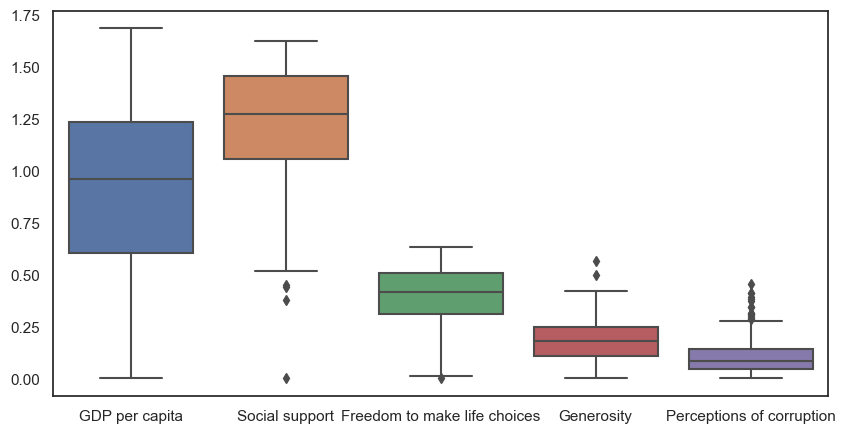

In [155]:
sns.boxplot(data = y_2019.loc[:, ['GDP per capita','Social support','Freedom to make life choices','Generosity', 'Perceptions of corruption']])

In [156]:
OutLiersBox(y_2019, 'GDP per capita')

In [157]:
OutLiersBox(y_2019, 'Social support')

In [158]:
outliers_social_support_2019 = y_2019.loc[df['Social support'] < 0.517]
outliers_social_support_2019

Overall rank         Country or region  Score  GDP per capita  \
257           102                     Benin  4.883           0.393   
300           145                   Burundi  3.775           0.046   
304           149                     Syria  3.462           0.619   
310           155  Central African Republic  3.083           0.026   

     Social support  Freedom to make life choices  Generosity  \
257           0.437                         0.349       0.175   
300           0.447                         0.220       0.176   
304           0.378                         0.013       0.331   
310           0.000                         0.225       0.235   

     Perceptions of corruption  year  
257                      0.082  2019  
300                      0.180  2019  
304                      0.141  2019  
310                      0.035  2019

In [120]:
fig = px.bar(outliers_social_support_2019, x = 'Country or region', y = ['GDP per capita', 'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Outliers in social support in 2019',
      barmode = 'group')
fig.show()

Benin, Burundi, and Syria scored really low in social support. Whereas we don't have any score in social support for the Central African Republic.

In [159]:
OutLiersBox(y_2019, 'Freedom to make life choices')

In [160]:
outliers_freedom_2019 = y_2019[y_2019['Freedom to make life choices'] < 0.01]
outliers_freedom_2019

Overall rank Country or region  Score  GDP per capita  Social support  \
309           154       Afghanistan  3.203            0.35           0.517   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
309                           0.0       0.158                      0.025  2019

In [161]:
px.bar(outliers_freedom_2019, x = 'Country or region', y = ['GDP per capita', 'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Outliers in freedom to make life choices in 2019',
      barmode = 'group')

Afghanistan had no score in freedom to make life choices in 2019.

In [162]:
OutLiersBox(y_2019, 'Generosity')

In [163]:
outliers_generosity_2019 = y_2019[y_2019['Generosity'] > 0.419]
outliers_generosity_2019

Overall rank Country or region  Score  GDP per capita  Social support  \
247            92         Indonesia  5.192           0.931           1.203   
286           131           Myanmar  4.360           0.710           1.181   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
247                         0.491       0.498                      0.028  2019  
286                         0.525       0.566                      0.172  2019

In [126]:
px.bar(outliers_generosity_2019, x = 'Country or region', y = ['GDP per capita', 'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Outliers in generosity in 2019',
      barmode = 'group')

Indonesia and Myanmar scored high in generosity but low in GDP per capita and perceptions of corruption.

In [164]:
OutLiersBox(y_2019, 'Perceptions of corruption')

In [128]:
outliers_corruption_2019 = y_2019[y_2019['Perceptions of corruption'] > 0.278]
outliers_corruption_2019

Overall rank Country or region  Score  GDP per capita  Social support  \
156             1           Finland  7.769           1.340           1.587   
157             2           Denmark  7.600           1.383           1.573   
158             3            Norway  7.554           1.488           1.582   
160             5       Netherlands  7.488           1.396           1.522   
161             6       Switzerland  7.480           1.452           1.526   
162             7            Sweden  7.343           1.387           1.487   
163             8       New Zealand  7.307           1.303           1.557   
164             9            Canada  7.278           1.365           1.505   
166            11         Australia  7.228           1.372           1.548   
169            14        Luxembourg  7.090           1.609           1.479   
171            16           Ireland  7.021           1.499           1.553   
189            34         Singapore  6.262           1.572           1.463   
231            76         Hong Kong  5.430           1.438           1.277   
307           152            Rwanda  3.334           0.359           0.711   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
156                         0.596       0.153                      0.393  2019  
157                         0.592       0.252                      0.410  2019  
158                         0.603       0.271                      0.341  2019  
160                         0.557       0.322                      0.298  2019  
161                         0.572       0.263                      0.343  2019  
162                         0.574       0.267                      0.373  2019  
163                         0.585       0.330                      0.380  2019  
164                         0.584       0.285                      0.308  2019  
166                         0.557       0.332                      0.290  2019  
169                         0.526       0.194                      0.316  2019  
171                         0.516       0.298                      0.310  2019  
189                         0.556       0.271                      0.453  2019  
231                         0.440       0.258                      0.287  2019  
307                         0.555       0.217                      0.411  2019

In [129]:
px.bar(outliers_corruption_2019, x = 'Country or region', y = ['GDP per capita', 'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Outliers in perceptions of corruption in 2019',
      barmode = 'group')

Like for 2018, in 2019 we had some countries that scored high in perceptions of corruption and that mostly scored high in GDP per capita and social support too. Let' take a closer look.

In [167]:
outliers_corruption_2019 = outliers_corruption_2019.sort_values(by='Score',ascending=False)
outliers_corruption_2019

Overall rank Country or region  Score  GDP per capita  Social support  \
156             1           Finland  7.769           1.340           1.587   
157             2           Denmark  7.600           1.383           1.573   
158             3            Norway  7.554           1.488           1.582   
160             5       Netherlands  7.488           1.396           1.522   
161             6       Switzerland  7.480           1.452           1.526   
162             7            Sweden  7.343           1.387           1.487   
163             8       New Zealand  7.307           1.303           1.557   
164             9            Canada  7.278           1.365           1.505   
166            11         Australia  7.228           1.372           1.548   
169            14        Luxembourg  7.090           1.609           1.479   
171            16           Ireland  7.021           1.499           1.553   
189            34         Singapore  6.262           1.572           1.463   
231            76         Hong Kong  5.430           1.438           1.277   
307           152            Rwanda  3.334           0.359           0.711   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
156                         0.596       0.153                      0.393  2019  
157                         0.592       0.252                      0.410  2019  
158                         0.603       0.271                      0.341  2019  
160                         0.557       0.322                      0.298  2019  
161                         0.572       0.263                      0.343  2019  
162                         0.574       0.267                      0.373  2019  
163                         0.585       0.330                      0.380  2019  
164                         0.584       0.285                      0.308  2019  
166                         0.557       0.332                      0.290  2019  
169                         0.526       0.194                      0.316  2019  
171                         0.516       0.298                      0.310  2019  
189                         0.556       0.271                      0.453  2019  
231                         0.440       0.258                      0.287  2019  
307                         0.555       0.217                      0.411  2019

In [168]:
px.bar(outliers_corruption_2019, x='Country or region',y='Score')

We can observe a progressive decline in the total score and a drop at Singapore.

In [169]:
outliers_corruption_2019.loc[outliers_corruption_2019['Country or region'] == 'Singapore']

Overall rank Country or region  Score  GDP per capita  Social support  \
189            34         Singapore  6.262           1.572           1.463   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
189                         0.556       0.271                      0.453  2019

In [176]:
corruption_2019_toanalyze = outliers_corruption_2019.loc[outliers_corruption_2019['Score'] <= 6.262]
corruption_2019_toanalyze

Overall rank Country or region  Score  GDP per capita  Social support  \
231            76         Hong Kong  5.430           1.438           1.277   
307           152            Rwanda  3.334           0.359           0.711   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
231                         0.440       0.258                      0.287  2019  
307                         0.555       0.217                      0.411  2019

In [178]:
px.bar(corruption_2019_toanalyze, x = 'Country or region', y = ['GDP per capita', 'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Outliers in perceptions of corruption in 2019 to analyze',
      barmode = 'group')

We can see that Hong Kong scored quite high in GDP per capita but extremely low in freedom to make life choices and generosity. Rwanda scored extremely low in GDP per capita and social support.

Let's have a look at some correlations.

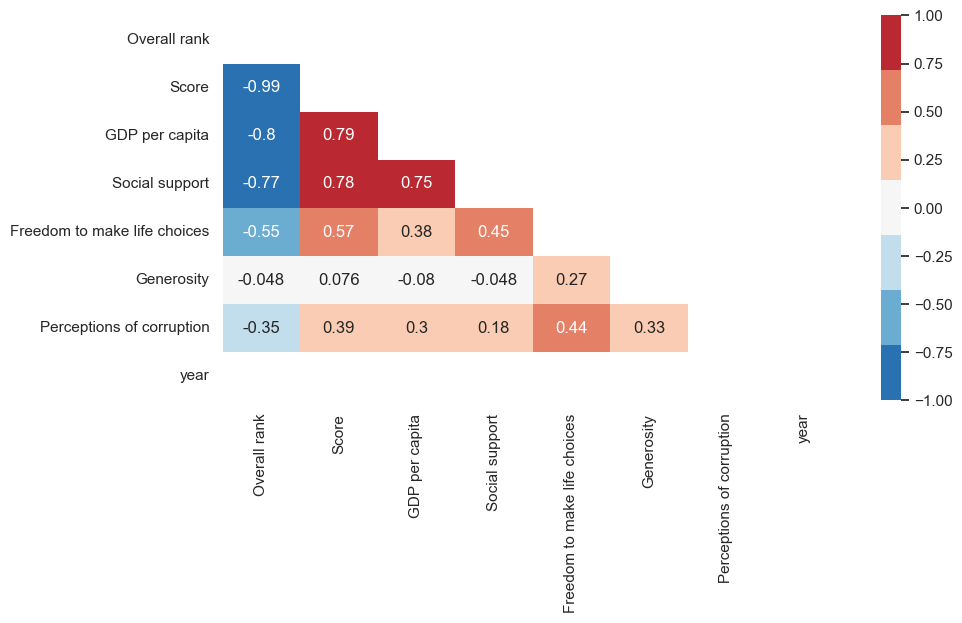

In [179]:
corrCoef_Threshold(y_2019)

Like in 2018, GDP per capita and social support had a higher impact on the overall happiness score. Freedom to make life choices had a moderate impact, whereas perceptions of corruptions impacted less compared to 2018. Let's explore more deeply.

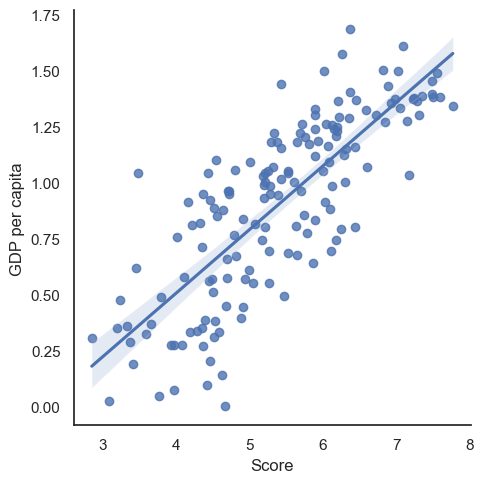

In [180]:
sns.lmplot(x='Score', y='GDP per capita', data=y_2019)

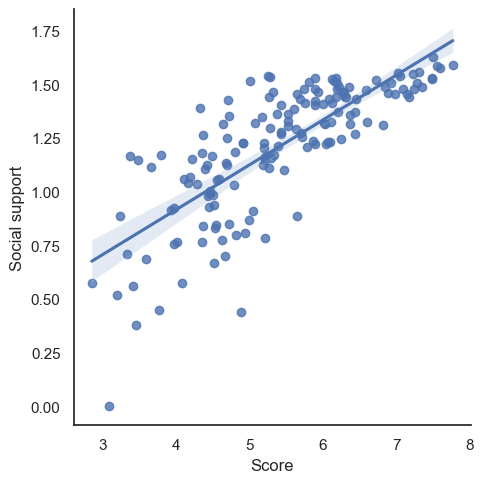

In [181]:
sns.lmplot(x='Score', y='Social support', data=y_2019)

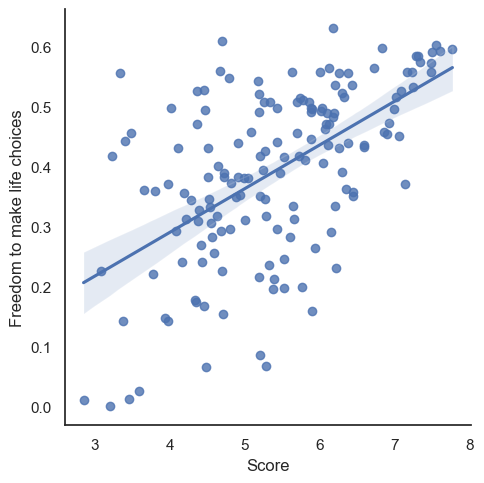

In [187]:
sns.lmplot(x='Score', y='Freedom to make life choices', data=y_2019)

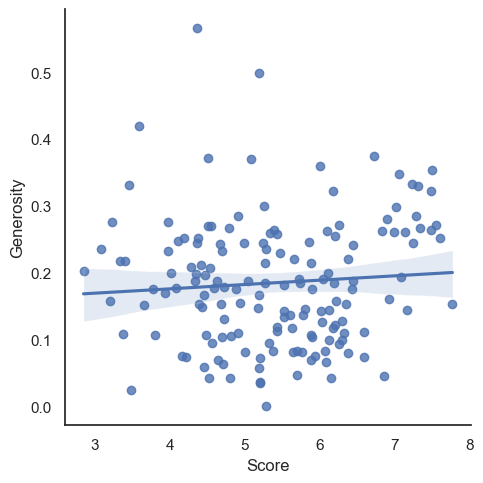

In [188]:
sns.lmplot(x='Score', y='Generosity', data=y_2019)

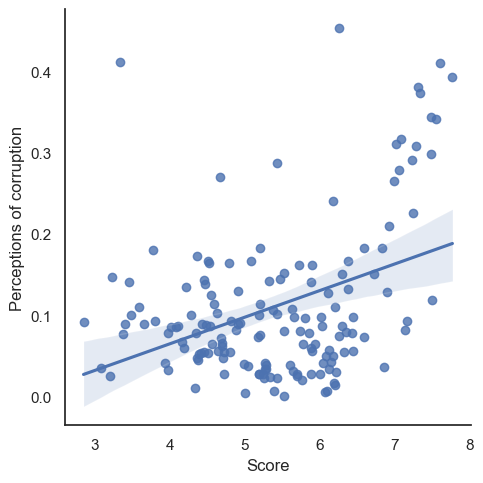

In [189]:
sns.lmplot(x='Score', y='Perceptions of corruption', data=y_2019)

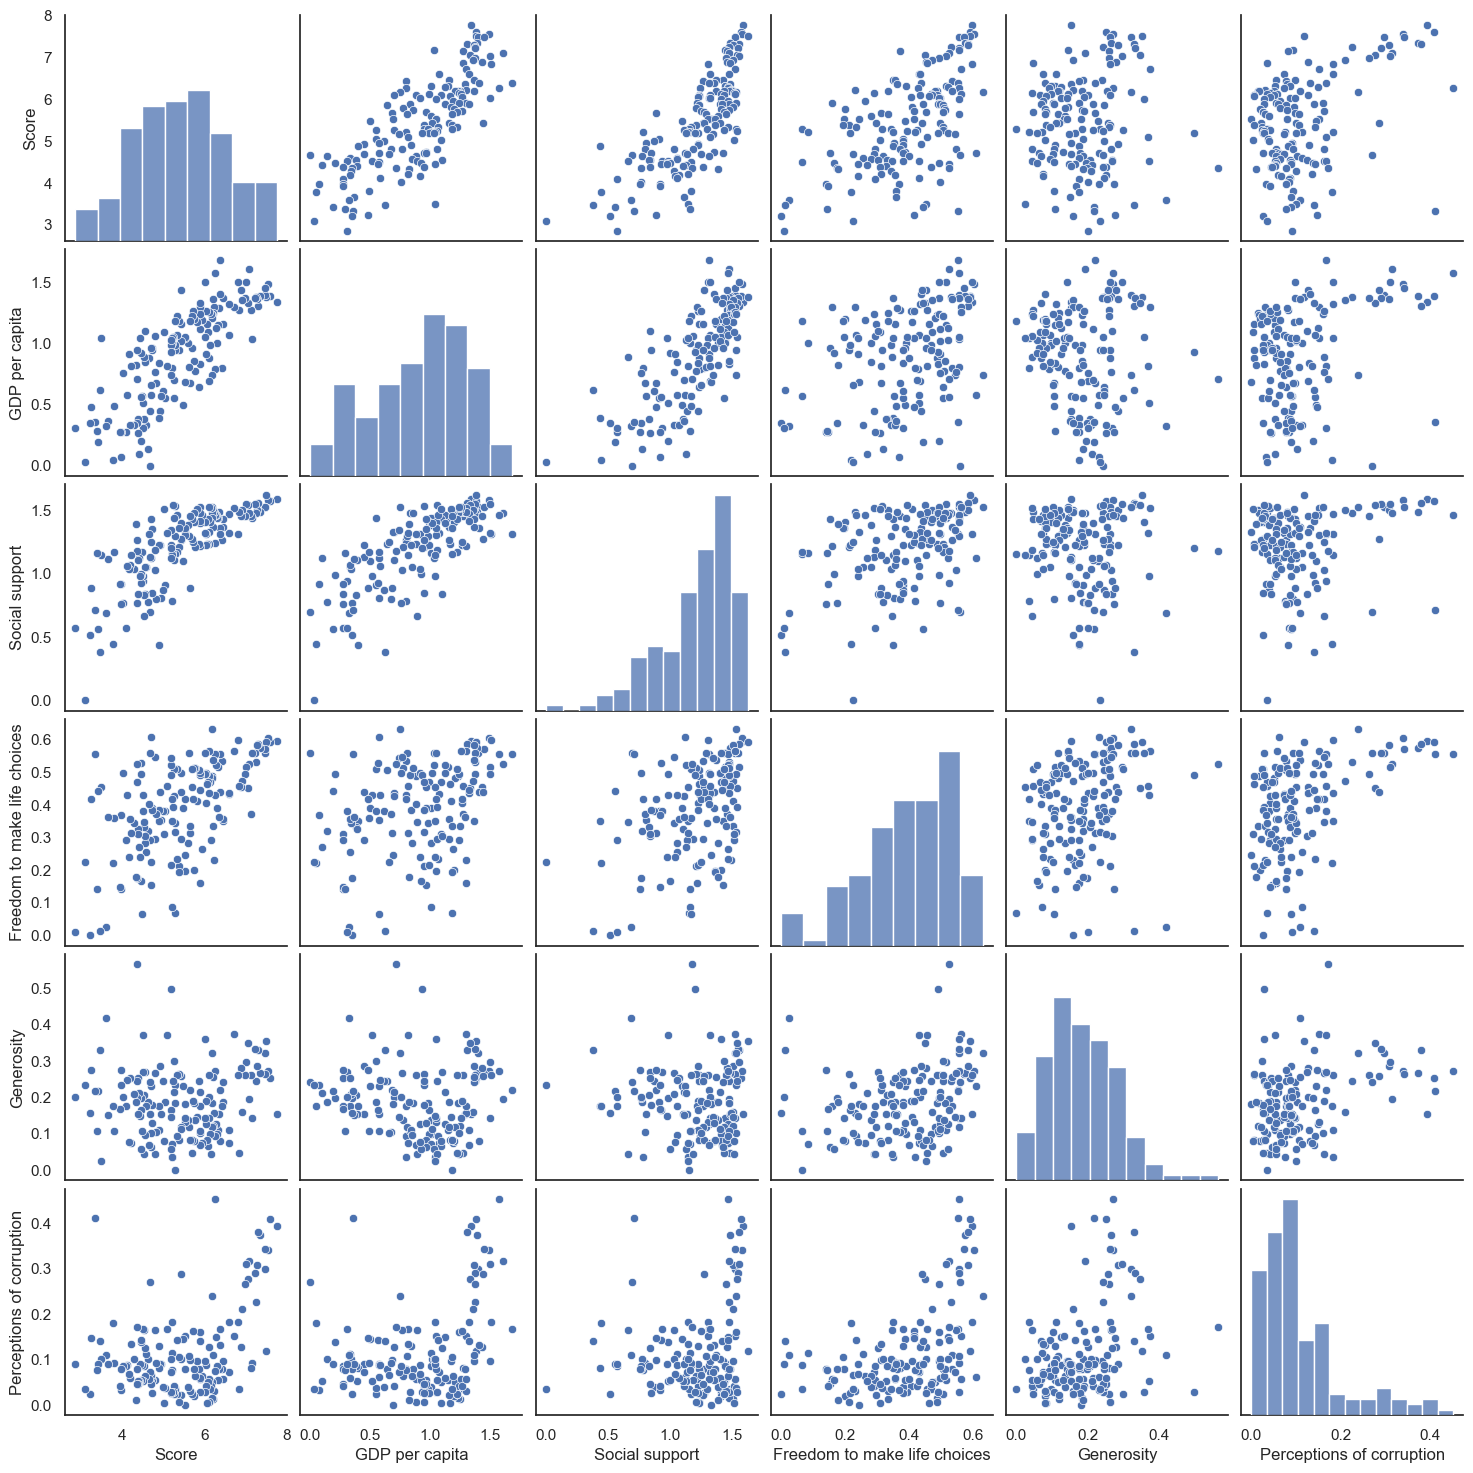

In [190]:
sns.pairplot(y_2019, vars = ['Score','GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'])

Once again, we can see that GDP per capita and social support had the strongest and more positve correlation with the total happiness score. Freedom to make life choices impacted moderately. Perceptions of corruption contributed only minimally, whereas generosity barely had any impact on the overall total score.

Let's analyze the 10 happiest countries in 2018 and then in 2019.

In [191]:
top_2018 = y_2018.head(10)
top_2018

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   
5             6       Netherlands  7.441           1.361           1.488   
6             7            Canada  7.328           1.330           1.532   
7             8       New Zealand  7.324           1.268           1.601   
8             9            Sweden  7.314           1.355           1.501   
9            10         Australia  7.272           1.340           1.573   

   Freedom to make life choices  Generosity  Perceptions of corruption  year  
0                         0.681       0.202                      0.393  2018  
1                         0.686       0.286                      0.340  2018  
2                         0.683       0.284                      0.408  2018  
3                         0.677       0.353                      0.138  2018  
4                         0.660       0.256                      0.357  2018  
5                         0.638       0.333                      0.295  2018  
6                         0.653       0.321                      0.291  2018  
7                         0.669       0.365                      0.389  2018  
8                         0.659       0.285                      0.383  2018  
9                         0.647       0.361                      0.302  2018

In [194]:
px.bar(top_2018,x='Country or region', y = ['GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Top 10 happiest countries in 2018',
      barmode = 'group')

What made these countries happy?

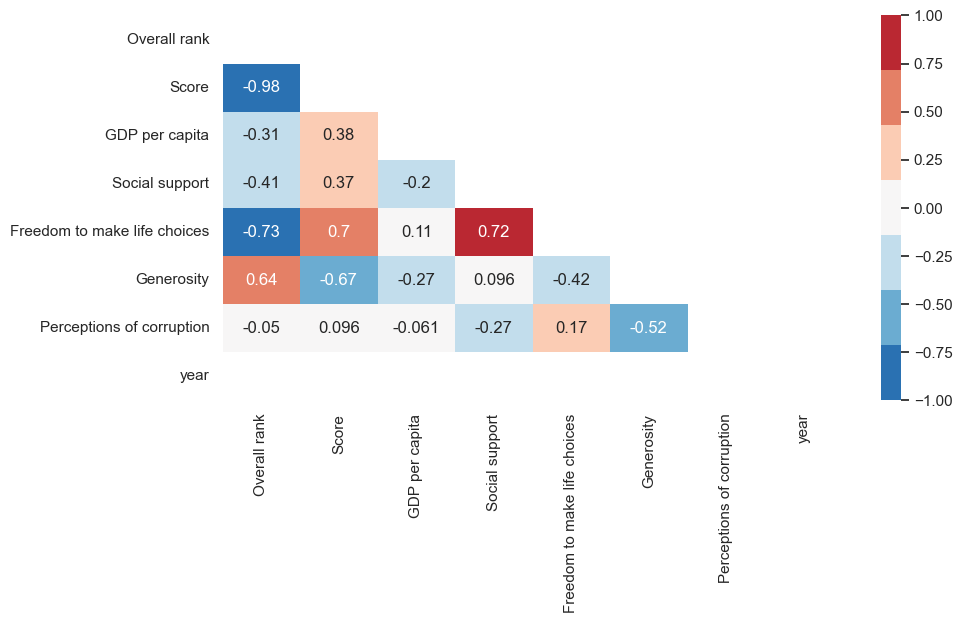

In [195]:
corrCoef_Threshold(top_2018)

Interestingly, unlike for the general score, GDP per capita and social support had a really small impact on the overall score. What seemed to have a higher impact was the freedom to make life choices. Let's explore.

Are the countries with the highest GDP per capita the happiest ones?

In [196]:
high_GDP_2018 = y_2018[['Country or region','Score','GDP per capita','Social support','Freedom to make life choices','Generosity', 'Perceptions of corruption', 'year']].sort_values(by='GDP per capita',ascending=False).head(10)
high_GDP_2018

Country or region  Score  GDP per capita  Social support  \
19  United Arab Emirates  6.774           2.096           0.776   
31                 Qatar  6.374           1.649           1.303   
16            Luxembourg  6.910           1.576           1.520   
33             Singapore  6.343           1.529           1.451   
44                Kuwait  6.083           1.474           1.301   
1                 Norway  7.594           1.456           1.582   
13               Ireland  6.977           1.448           1.583   
4            Switzerland  7.487           1.420           1.549   
75             Hong Kong  5.430           1.405           1.290   
17         United States  6.886           1.398           1.471   

    Freedom to make life choices  Generosity  Perceptions of corruption  year  
19                         0.284       0.186                      0.082  2018  
31                         0.654       0.256                      0.171  2018  
16                         0.632       0.196                      0.321  2018  
33                         0.631       0.261                      0.457  2018  
44                         0.554       0.167                      0.106  2018  
1                          0.686       0.286                      0.340  2018  
13                         0.614       0.307                      0.306  2018  
4                          0.660       0.256                      0.357  2018  
75                         0.524       0.246                      0.291  2018  
17                         0.547       0.291                      0.133  2018

In [198]:
px.bar(high_GDP_2018,x='Country or region', y = ['GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Top 10 countries with a higher GDP per capita in 2018',
      barmode = 'group')

In [200]:
common_top_GDP_2018 = high_GDP_2018.loc[high_GDP_2018['Country or region'].isin(top_2018['Country or region'])].copy()
common_top_GDP_2018

Country or region  Score  GDP per capita  Social support  \
1            Norway  7.594           1.456           1.582   
4       Switzerland  7.487           1.420           1.549   

   Freedom to make life choices  Generosity  Perceptions of corruption  year  
1                         0.686       0.286                      0.340  2018  
4                         0.660       0.256                      0.357  2018

Only Norway and Switzerland belong in the top 10 happiest countries. What about the remaining 8?

In [201]:
high_GDP_not_top_2018 = high_GDP_2018.loc[~high_GDP_2018['Country or region'].isin(top_2018['Country or region'])].copy()
high_GDP_not_top_2018

Country or region  Score  GDP per capita  Social support  \
19  United Arab Emirates  6.774           2.096           0.776   
31                 Qatar  6.374           1.649           1.303   
16            Luxembourg  6.910           1.576           1.520   
33             Singapore  6.343           1.529           1.451   
44                Kuwait  6.083           1.474           1.301   
13               Ireland  6.977           1.448           1.583   
75             Hong Kong  5.430           1.405           1.290   
17         United States  6.886           1.398           1.471   

    Freedom to make life choices  Generosity  Perceptions of corruption  year  
19                         0.284       0.186                      0.082  2018  
31                         0.654       0.256                      0.171  2018  
16                         0.632       0.196                      0.321  2018  
33                         0.631       0.261                      0.457  2018  
44                         0.554       0.167                      0.106  2018  
13                         0.614       0.307                      0.306  2018  
75                         0.524       0.246                      0.291  2018  
17                         0.547       0.291                      0.133  2018

In [202]:
px.bar(high_GDP_not_top_2018,x='Country or region', y = ['GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Countries with a high GDP per capita but not in the top 10 happiest countries in 2018',
      barmode = 'group')

We can see that United Arab Emirates scored extremely high in GDP per capita but extremely low in social support, freedom to make life choices, generosity and perceptions of corruption. Qatar didn't score quite high in social support. Kuwait and Hong Kong scored pretty low in social support, and Kuwait also socred low in generosity and perceptions of corruption. Singapore scored a little bit lower in generosity. Luxembourg, Ireland, and the United States scored quite high but not enough to get them into the top 10 happiest countries.

In [204]:
px.choropleth(high_GDP_2018, locations='Country or region',
             locationmode='country names',
             title = 'Top 10 countries with highest GDP per capita in 2018',
             color='Score')

In [208]:
px.choropleth(top_2018, locations='Country or region',
             locationmode='country names',
             title = 'Top 10 happiest countries in 2018',
             color='Score')

As seen in these two maps, the countries with a higher GDP per capita aren't necessarily the happiest ones.

Let's take a closer look at social support.

In [212]:
high_socialsupport_2018 = y_2018[['Country or region','Score','GDP per capita','Social support','Freedom to make life choices','Generosity', 'Perceptions of corruption', 'year']].sort_values(by='Social support',ascending=False).head(10)
high_socialsupport_2018

Country or region  Score  GDP per capita  Social support  \
3            Iceland  7.495           1.343           1.644   
7        New Zealand  7.324           1.268           1.601   
0            Finland  7.632           1.305           1.592   
2            Denmark  7.555           1.351           1.590   
43        Uzbekistan  6.096           0.719           1.584   
13           Ireland  6.977           1.448           1.583   
1             Norway  7.594           1.456           1.582   
9          Australia  7.272           1.340           1.573   
18            Israel  6.814           1.301           1.559   
4        Switzerland  7.487           1.420           1.549   

    Freedom to make life choices  Generosity  Perceptions of corruption  year  
3                          0.677       0.353                      0.138  2018  
7                          0.669       0.365                      0.389  2018  
0                          0.681       0.202                      0.393  2018  
2                          0.683       0.284                      0.408  2018  
43                         0.724       0.328                      0.259  2018  
13                         0.614       0.307                      0.306  2018  
1                          0.686       0.286                      0.340  2018  
9                          0.647       0.361                      0.302  2018  
18                         0.533       0.354                      0.272  2018  
4                          0.660       0.256                      0.357  2018

In [214]:
px.bar(high_socialsupport_2018,x='Country or region', y = ['GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Top 10 countries with a higher social support in 2018',
      barmode = 'group')

In [215]:
common_top_socialsupport_2018 = high_socialsupport_2018.loc[high_socialsupport_2018['Country or region'].isin(top_2018['Country or region'])].copy()
common_top_socialsupport_2018

Country or region  Score  GDP per capita  Social support  \
3           Iceland  7.495           1.343           1.644   
7       New Zealand  7.324           1.268           1.601   
0           Finland  7.632           1.305           1.592   
2           Denmark  7.555           1.351           1.590   
1            Norway  7.594           1.456           1.582   
9         Australia  7.272           1.340           1.573   
4       Switzerland  7.487           1.420           1.549   

   Freedom to make life choices  Generosity  Perceptions of corruption  year  
3                         0.677       0.353                      0.138  2018  
7                         0.669       0.365                      0.389  2018  
0                         0.681       0.202                      0.393  2018  
2                         0.683       0.284                      0.408  2018  
1                         0.686       0.286                      0.340  2018  
9                         0.647       0.361                      0.302  2018  
4                         0.660       0.256                      0.357  2018

In [219]:
len(common_top_socialsupport_2018)

7

7 countries in the top 10 countries with a higher social support also belong to the top 10 happiest countries. What about the remaining 3 countries?

In [220]:
high_socialsupport_not_top_2018 = high_socialsupport_2018.loc[~high_socialsupport_2018['Country or region'].isin(top_2018['Country or region'])].copy()
high_socialsupport_not_top_2018

Country or region  Score  GDP per capita  Social support  \
43        Uzbekistan  6.096           0.719           1.584   
13           Ireland  6.977           1.448           1.583   
18            Israel  6.814           1.301           1.559   

    Freedom to make life choices  Generosity  Perceptions of corruption  year  
43                         0.724       0.328                      0.259  2018  
13                         0.614       0.307                      0.306  2018  
18                         0.533       0.354                      0.272  2018

In [223]:
px.bar(high_socialsupport_not_top_2018,x='Country or region', y = ['GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Top 10 countries with a higher social support but not among the 10 happiest countries in 2018',
      barmode = 'group')

Uzbekistan scored extremely low in GDP per capita, Ireland scored quite loq in generosity and perceptions of corruption, whereas Israels scored quite low in freedom to make life choices, generosity and perceptions of corruption.

In [225]:
px.choropleth(high_socialsupport_2018, locations='Country or region',
             locationmode='country names',
             title = 'Top 10 countries with the highest social support in 2018',
             color='Score')

In [226]:
px.choropleth(top_2018, locations='Country or region',
             locationmode='country names',
             title = 'Top 10 happiest countries in 2018',
             color='Score')

Social support had an impact but alone wasn't enough. Let's take a look at freedom to make life choices.

In [227]:
high_freedom_2018 = y_2018[['Country or region','Score','GDP per capita','Social support','Freedom to make life choices','Generosity', 'Perceptions of corruption', 'year']].sort_values(by='Freedom to make life choices',ascending=False).head(10)
high_freedom_2018

Country or region  Score  GDP per capita  Social support  \
43         Uzbekistan  6.096           0.719           1.584   
119          Cambodia  4.433           0.549           1.088   
1              Norway  7.594           1.456           1.582   
2             Denmark  7.555           1.351           1.590   
0             Finland  7.632           1.305           1.592   
3             Iceland  7.495           1.343           1.644   
97            Somalia  4.982           0.000           0.712   
7         New Zealand  7.324           1.268           1.601   
4         Switzerland  7.487           1.420           1.549   
8              Sweden  7.314           1.355           1.501   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
43                          0.724       0.328                      0.259  2018  
119                         0.696       0.256                      0.065  2018  
1                           0.686       0.286                      0.340  2018  
2                           0.683       0.284                      0.408  2018  
0                           0.681       0.202                      0.393  2018  
3                           0.677       0.353                      0.138  2018  
97                          0.674       0.238                      0.282  2018  
7                           0.669       0.365                      0.389  2018  
4                           0.660       0.256                      0.357  2018  
8                           0.659       0.285                      0.383  2018

In [229]:
px.bar(high_freedom_2018, x = 'Country or region', y = ['GDP per capita', 'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Top 10 countries with the highest freedom to make life choices in 2018',
      barmode = 'group')

In [230]:
common_top_freedom_2018 = high_freedom_2018.loc[high_freedom_2018['Country or region'].isin(top_2018['Country or region'])].copy()
common_top_freedom_2018

Country or region  Score  GDP per capita  Social support  \
1            Norway  7.594           1.456           1.582   
2           Denmark  7.555           1.351           1.590   
0           Finland  7.632           1.305           1.592   
3           Iceland  7.495           1.343           1.644   
7       New Zealand  7.324           1.268           1.601   
4       Switzerland  7.487           1.420           1.549   
8            Sweden  7.314           1.355           1.501   

   Freedom to make life choices  Generosity  Perceptions of corruption  year  
1                         0.686       0.286                      0.340  2018  
2                         0.683       0.284                      0.408  2018  
0                         0.681       0.202                      0.393  2018  
3                         0.677       0.353                      0.138  2018  
7                         0.669       0.365                      0.389  2018  
4                         0.660       0.256                      0.357  2018  
8                         0.659       0.285                      0.383  2018

In [231]:
len(common_top_freedom_2018)

7

7 of the countries with a higher freedom to make life choices also belong to the top 10 happiest countries. What about the remaining 3 countries?

In [232]:
high_freedom_not_top_2018 = high_freedom_2018.loc[~high_freedom_2018['Country or region'].isin(top_2018['Country or region'])].copy()
high_freedom_not_top_2018

Country or region  Score  GDP per capita  Social support  \
43         Uzbekistan  6.096           0.719           1.584   
119          Cambodia  4.433           0.549           1.088   
97            Somalia  4.982           0.000           0.712   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
43                          0.724       0.328                      0.259  2018  
119                         0.696       0.256                      0.065  2018  
97                          0.674       0.238                      0.282  2018

In [233]:
px.bar(high_freedom_not_top_2018, x = 'Country or region', y = ['GDP per capita', 'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Countries with a high freedom to make life choices but not among the top 10 happiest countries in 2018',
      barmode = 'group')

Uzbekistan scored low in GDP per capita, whereas Cambodia and Somalia scored low in social support. Moreover, we don't have any score for Somalia's GDP per capita in 2018.

In [234]:
px.choropleth(high_freedom_2018, locations='Country or region',
             locationmode='country names',
             title = 'Top 10 countries with a high freedom to make life choices in 2018',
             color='Score')

In [236]:
px.choropleth(top_2018, locations='Country or region',
             locationmode='country names',
             title = 'Top 10 happiest countries in 2018',
             color='Score')

In 2018, freedom to make life choices seemed to have a important impact, but alone it wasn't enough to determine the overall happiness of a country.

Let's take a look at the top 10 happiest countries in 2019.

In [237]:
top_2019 = y_2019.head(10)
top_2019

Overall rank Country or region  Score  GDP per capita  Social support  \
156             1           Finland  7.769           1.340           1.587   
157             2           Denmark  7.600           1.383           1.573   
158             3            Norway  7.554           1.488           1.582   
159             4           Iceland  7.494           1.380           1.624   
160             5       Netherlands  7.488           1.396           1.522   
161             6       Switzerland  7.480           1.452           1.526   
162             7            Sweden  7.343           1.387           1.487   
163             8       New Zealand  7.307           1.303           1.557   
164             9            Canada  7.278           1.365           1.505   
165            10           Austria  7.246           1.376           1.475   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
156                         0.596       0.153                      0.393  2019  
157                         0.592       0.252                      0.410  2019  
158                         0.603       0.271                      0.341  2019  
159                         0.591       0.354                      0.118  2019  
160                         0.557       0.322                      0.298  2019  
161                         0.572       0.263                      0.343  2019  
162                         0.574       0.267                      0.373  2019  
163                         0.585       0.330                      0.380  2019  
164                         0.584       0.285                      0.308  2019  
165                         0.532       0.244                      0.226  2019

In [238]:
px.bar(top_2019, x = 'Country or region', y = ['GDP per capita', 'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Top 10 happiest countries in 2019',
      barmode = 'group')

What made these countries happy?

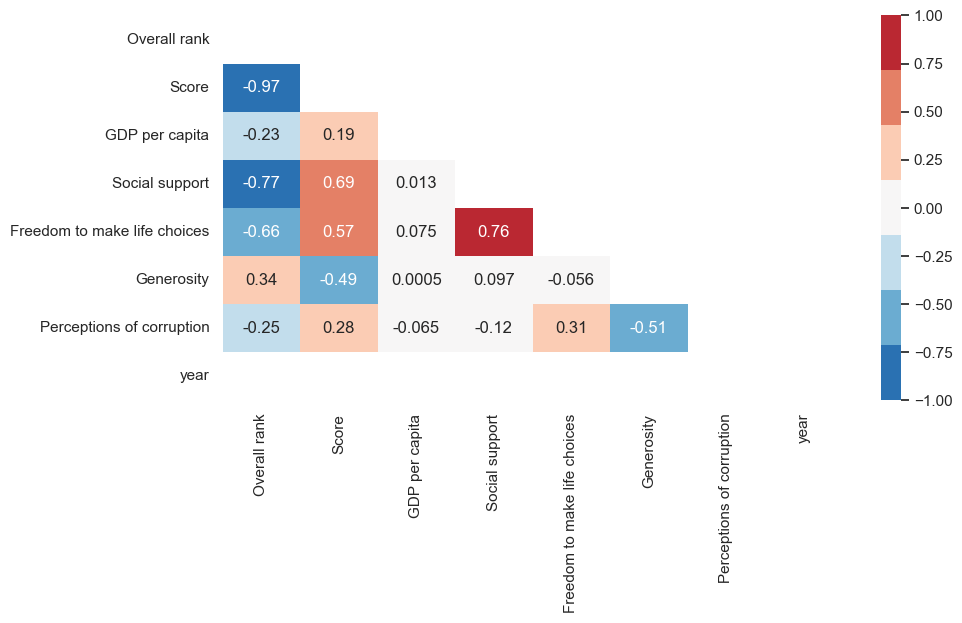

In [239]:
corrCoef_Threshold(top_2019)

In 2019, social support and freedom to make life choices seemed to have impacted more on the overall happiness score. Perceptions of corruption seemed to have had a slightly moderate impact, whereas GDP per capita didn't seem to impact the overall score at all. Let's take a closer look.

In [240]:
high_GDP_2019 = y_2019[['Country or region','Score','GDP per capita','Social support','Freedom to make life choices','Generosity', 'Perceptions of corruption', 'year']].sort_values(by='GDP per capita',ascending=False).head(10)
high_GDP_2019

Country or region  Score  GDP per capita  Social support  \
184                 Qatar  6.374           1.684           1.313   
169            Luxembourg  7.090           1.609           1.479   
189             Singapore  6.262           1.572           1.463   
176  United Arab Emirates  6.825           1.503           1.310   
206                Kuwait  6.021           1.500           1.319   
171               Ireland  7.021           1.499           1.553   
158                Norway  7.554           1.488           1.582   
161           Switzerland  7.480           1.452           1.526   
231             Hong Kong  5.430           1.438           1.277   
174         United States  6.892           1.433           1.457   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
184                         0.555       0.220                      0.167  2019  
169                         0.526       0.194                      0.316  2019  
189                         0.556       0.271                      0.453  2019  
176                         0.598       0.262                      0.182  2019  
206                         0.493       0.142                      0.097  2019  
171                         0.516       0.298                      0.310  2019  
158                         0.603       0.271                      0.341  2019  
161                         0.572       0.263                      0.343  2019  
231                         0.440       0.258                      0.287  2019  
174                         0.454       0.280                      0.128  2019

In [241]:
px.bar(high_GDP_2019,x='Country or region', y = ['GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Top 10 countries with a higher GDP per capita in 2019',
      barmode = 'group')

In [243]:
common_top_GDP_2019 = high_GDP_2019.loc[high_GDP_2019['Country or region'].isin(top_2019['Country or region'])].copy()
common_top_GDP_2019

Country or region  Score  GDP per capita  Social support  \
158            Norway  7.554           1.488           1.582   
161       Switzerland  7.480           1.452           1.526   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
158                         0.603       0.271                      0.341  2019  
161                         0.572       0.263                      0.343  2019

Only two countries belong to the top 10 happiest countries in 2019. What about the remaining 8 countries?

In [244]:
high_GDP_not_top_2019 = high_GDP_2019.loc[~high_GDP_2019['Country or region'].isin(top_2019['Country or region'])].copy()
high_GDP_not_top_2019

Country or region  Score  GDP per capita  Social support  \
184                 Qatar  6.374           1.684           1.313   
169            Luxembourg  7.090           1.609           1.479   
189             Singapore  6.262           1.572           1.463   
176  United Arab Emirates  6.825           1.503           1.310   
206                Kuwait  6.021           1.500           1.319   
171               Ireland  7.021           1.499           1.553   
231             Hong Kong  5.430           1.438           1.277   
174         United States  6.892           1.433           1.457   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
184                         0.555       0.220                      0.167  2019  
169                         0.526       0.194                      0.316  2019  
189                         0.556       0.271                      0.453  2019  
176                         0.598       0.262                      0.182  2019  
206                         0.493       0.142                      0.097  2019  
171                         0.516       0.298                      0.310  2019  
231                         0.440       0.258                      0.287  2019  
174                         0.454       0.280                      0.128  2019

In [245]:
px.bar(high_GDP_not_top_2019,x='Country or region', y = ['GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Countries with a higher GDP per capita but not among the top 10 in 2019',
      barmode = 'group')

Qatar didn't score that high in social support and it scored quite low in perceptions of corruption. Luxembourg scored quite low in generosity, Singapore and Ireland seemed to have quite high scores but not enough to enter the top 10, the United Arab Emirates score lower in social support and in perceptions of corruption, Kuwait scored lower in social support, perceptions of corruption and generosity, Hong Kong scored a bit lower in social support and in freedom to make life choices, and the United States scored lower in freedom to make life choices and perceptions of corruption.

In [247]:
px.choropleth(high_GDP_2019, locations='Country or region',
             locationmode='country names',
             title = 'Top 10 countries with a higher GDP per capita in 2019',
             color='Score')

In [248]:
px.choropleth(top_2019, locations='Country or region',
             locationmode='country names',
             title = 'Top 10 happiest countries in 2019',
             color='Score')

GDP on its own, once again, is not enough to determine a country's overall level of happiness.

Let's explore social support.

In [249]:
high_socialsupport_2019 = y_2019[['Country or region','Score','GDP per capita','Social support','Freedom to make life choices','Generosity', 'Perceptions of corruption', 'year']].sort_values(by='Social support',ascending=False).head(10)
high_socialsupport_2019

Country or region  Score  GDP per capita  Social support  \
159           Iceland  7.494           1.380           1.624   
156           Finland  7.769           1.340           1.587   
158            Norway  7.554           1.488           1.582   
157           Denmark  7.600           1.383           1.573   
163       New Zealand  7.307           1.303           1.557   
171           Ireland  7.021           1.499           1.553   
166         Australia  7.228           1.372           1.548   
242      Turkmenistan  5.247           1.052           1.538   
170    United Kingdom  7.054           1.333           1.538   
238          Mongolia  5.285           0.948           1.531   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
159                         0.591       0.354                      0.118  2019  
156                         0.596       0.153                      0.393  2019  
158                         0.603       0.271                      0.341  2019  
157                         0.592       0.252                      0.410  2019  
163                         0.585       0.330                      0.380  2019  
171                         0.516       0.298                      0.310  2019  
166                         0.557       0.332                      0.290  2019  
242                         0.394       0.244                      0.028  2019  
170                         0.450       0.348                      0.278  2019  
238                         0.317       0.235                      0.038  2019

In [250]:
px.bar(high_socialsupport_2019,x='Country or region', y = ['GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Top 10 countries with a higher social support in 2019',
      barmode = 'group')

In [252]:
common_top_socialsupport_2019 = high_socialsupport_2019.loc[high_socialsupport_2019['Country or region'].isin(top_2019['Country or region'])].copy()
common_top_socialsupport_2019

Country or region  Score  GDP per capita  Social support  \
159           Iceland  7.494           1.380           1.624   
156           Finland  7.769           1.340           1.587   
158            Norway  7.554           1.488           1.582   
157           Denmark  7.600           1.383           1.573   
163       New Zealand  7.307           1.303           1.557   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
159                         0.591       0.354                      0.118  2019  
156                         0.596       0.153                      0.393  2019  
158                         0.603       0.271                      0.341  2019  
157                         0.592       0.252                      0.410  2019  
163                         0.585       0.330                      0.380  2019

5 countries belong to the top 10 happiest countries. What about the remaining 5 countries?

In [254]:
high_socialsupport_not_top_2019 = high_socialsupport_2019.loc[~high_socialsupport_2019['Country or region'].isin(top_2019['Country or region'])].copy()
high_socialsupport_not_top_2019

Country or region  Score  GDP per capita  Social support  \
171           Ireland  7.021           1.499           1.553   
166         Australia  7.228           1.372           1.548   
242      Turkmenistan  5.247           1.052           1.538   
170    United Kingdom  7.054           1.333           1.538   
238          Mongolia  5.285           0.948           1.531   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
171                         0.516       0.298                      0.310  2019  
166                         0.557       0.332                      0.290  2019  
242                         0.394       0.244                      0.028  2019  
170                         0.450       0.348                      0.278  2019  
238                         0.317       0.235                      0.038  2019

In [255]:
px.bar(high_socialsupport_not_top_2019,x='Country or region', y = ['GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Countries with a higher social support but not among the top 10 in 2019',
      barmode = 'group')

Ireland, Australia, and the United Kingdom seemed to have scored quite high, but apparently not enough to enter the top 10. Turkmenistan and Mongolia scored low in GDP per capita and freedom to make life choices and extremely low in perceptions of corruption.

In [256]:
px.choropleth(high_socialsupport_2019, locations='Country or region',
             locationmode='country names',
             title = 'Top 10 countries with a social support in 2019',
             color='Score')

In [257]:
px.choropleth(top_2019, locations='Country or region',
             locationmode='country names',
             title = 'Top 10 happiest countries in 2019',
             color='Score')

Even in 2019, social support on its own contributed to the overall happiness score but wasn't enough. It seems to have countributed even less compared to 2018.

Let's analyze freedom to make life choices.

In [265]:
high_freedom_2019 = y_2019[['Country or region','Score','GDP per capita','Social support','Freedom to make life choices','Generosity', 'Perceptions of corruption', 'year']].sort_values(by='Freedom to make life choices',ascending=False).head(10)
high_freedom_2019

Country or region  Score  GDP per capita  Social support  \
196            Uzbekistan  6.174           0.745           1.529   
264              Cambodia  4.700           0.574           1.122   
158                Norway  7.554           1.488           1.582   
176  United Arab Emirates  6.825           1.503           1.310   
156               Finland  7.769           1.340           1.587   
157               Denmark  7.600           1.383           1.573   
159               Iceland  7.494           1.380           1.624   
163           New Zealand  7.307           1.303           1.557   
164                Canada  7.278           1.365           1.505   
162                Sweden  7.343           1.387           1.487   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
196                         0.631       0.322                      0.240  2019  
264                         0.609       0.232                      0.062  2019  
158                         0.603       0.271                      0.341  2019  
176                         0.598       0.262                      0.182  2019  
156                         0.596       0.153                      0.393  2019  
157                         0.592       0.252                      0.410  2019  
159                         0.591       0.354                      0.118  2019  
163                         0.585       0.330                      0.380  2019  
164                         0.584       0.285                      0.308  2019  
162                         0.574       0.267                      0.373  2019

In [266]:
px.bar(high_freedom_2019,x='Country or region', y = ['GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Top 10 countries with a higher freedom to make life choices in 2019',
      barmode = 'group')

In [267]:
common_top_freedom_2019 = high_freedom_2019.loc[high_freedom_2019['Country or region'].isin(top_2019['Country or region'])].copy()
common_top_freedom_2019

Country or region  Score  GDP per capita  Social support  \
158            Norway  7.554           1.488           1.582   
156           Finland  7.769           1.340           1.587   
157           Denmark  7.600           1.383           1.573   
159           Iceland  7.494           1.380           1.624   
163       New Zealand  7.307           1.303           1.557   
164            Canada  7.278           1.365           1.505   
162            Sweden  7.343           1.387           1.487   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
158                         0.603       0.271                      0.341  2019  
156                         0.596       0.153                      0.393  2019  
157                         0.592       0.252                      0.410  2019  
159                         0.591       0.354                      0.118  2019  
163                         0.585       0.330                      0.380  2019  
164                         0.584       0.285                      0.308  2019  
162                         0.574       0.267                      0.373  2019

In [268]:
len(common_top_freedom_2019)

7

7 countries also belong to the top 10 happiest countries in 2019. What about the remaining 3 countries?

In [269]:
high_freedom_not_top_2019 = high_freedom_2019.loc[~high_freedom_2019['Country or region'].isin(top_2019['Country or region'])].copy()
high_freedom_not_top_2019

Country or region  Score  GDP per capita  Social support  \
196            Uzbekistan  6.174           0.745           1.529   
264              Cambodia  4.700           0.574           1.122   
176  United Arab Emirates  6.825           1.503           1.310   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
196                         0.631       0.322                      0.240  2019  
264                         0.609       0.232                      0.062  2019  
176                         0.598       0.262                      0.182  2019

In [270]:
px.bar(high_freedom_not_top_2019,x='Country or region', y = ['GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Countries with a higher freedom to make life choices but not among the top 10 in 2019',
      barmode = 'group')

Uzbekistan and Cambodia scored low in GDP per capita, and Cambodia also scored low in perceptions of corruption and social support. United Arab Emirates seem to have scored relatively except for perceptions of corruption with was sligtly low.

In [271]:
px.choropleth(high_freedom_2019, locations='Country or region',
             locationmode='country names',
             title = 'Top 10 countries with a higher freedom to make life choices in 2019',
             color='Score')

In [272]:
px.choropleth(top_2019, locations='Country or region',
             locationmode='country names',
             title = 'Top 10 happiest countries in 2019',
             color='Score')

In 2019, freedom to make life choices seems to have contributed to the overall happiness score. However, alone, it's not enough.

Because perceptions of corrutpion seems to have had an impact on the overall happiness score in 2019, let's analyze this factor too.

In [273]:
high_corruption_2019 = y_2019[['Country or region','Score','GDP per capita','Social support','Freedom to make life choices','Generosity', 'Perceptions of corruption', 'year']].sort_values(by='Perceptions of corruption',ascending=False).head(10)
high_corruption_2019

Country or region  Score  GDP per capita  Social support  \
189         Singapore  6.262           1.572           1.463   
307            Rwanda  3.334           0.359           0.711   
157           Denmark  7.600           1.383           1.573   
156           Finland  7.769           1.340           1.587   
163       New Zealand  7.307           1.303           1.557   
162            Sweden  7.343           1.387           1.487   
161       Switzerland  7.480           1.452           1.526   
158            Norway  7.554           1.488           1.582   
169        Luxembourg  7.090           1.609           1.479   
171           Ireland  7.021           1.499           1.553   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
189                         0.556       0.271                      0.453  2019  
307                         0.555       0.217                      0.411  2019  
157                         0.592       0.252                      0.410  2019  
156                         0.596       0.153                      0.393  2019  
163                         0.585       0.330                      0.380  2019  
162                         0.574       0.267                      0.373  2019  
161                         0.572       0.263                      0.343  2019  
158                         0.603       0.271                      0.341  2019  
169                         0.526       0.194                      0.316  2019  
171                         0.516       0.298                      0.310  2019

In [274]:
px.bar(high_corruption_2019,x='Country or region', y = ['GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Top 10 countries with a higher perception of corruption in 2019',
      barmode = 'group')

In [275]:
common_top_corruption_2019 = high_corruption_2019.loc[high_corruption_2019['Country or region'].isin(top_2019['Country or region'])].copy()
common_top_corruption_2019

Country or region  Score  GDP per capita  Social support  \
157           Denmark  7.600           1.383           1.573   
156           Finland  7.769           1.340           1.587   
163       New Zealand  7.307           1.303           1.557   
162            Sweden  7.343           1.387           1.487   
161       Switzerland  7.480           1.452           1.526   
158            Norway  7.554           1.488           1.582   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
157                         0.592       0.252                      0.410  2019  
156                         0.596       0.153                      0.393  2019  
163                         0.585       0.330                      0.380  2019  
162                         0.574       0.267                      0.373  2019  
161                         0.572       0.263                      0.343  2019  
158                         0.603       0.271                      0.341  2019

In [276]:
len(common_top_corruption_2019)

6

6 countries belong to the top 10 happiest countries in 2019. What about the remaining 4 countries?

In [277]:
high_corruption_not_top_2019 = high_corruption_2019.loc[~high_corruption_2019['Country or region'].isin(top_2019['Country or region'])].copy()
high_corruption_not_top_2019

Country or region  Score  GDP per capita  Social support  \
189         Singapore  6.262           1.572           1.463   
307            Rwanda  3.334           0.359           0.711   
169        Luxembourg  7.090           1.609           1.479   
171           Ireland  7.021           1.499           1.553   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
189                         0.556       0.271                      0.453  2019  
307                         0.555       0.217                      0.411  2019  
169                         0.526       0.194                      0.316  2019  
171                         0.516       0.298                      0.310  2019

In [278]:
px.bar(high_corruption_not_top_2019,x='Country or region', y = ['GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption'],
      color_discrete_sequence = ['goldenrod','red','darkcyan','hotpink','grey'],
       title = 'Countries with a higher perception of corruption but not among the top 10 in 2019',
      barmode = 'group')

Singapore, Luxembourg, and Ireland didn't seem to score low. However, their overall score wasn't enough to get them into the top 10. Rwanda scored extremely low on GDP per capita and social support.

In [279]:
px.choropleth(high_corruption_2019, locations='Country or region',
             locationmode='country names',
             title = 'Top 10 countries with a higher perception of corruption in 2019',
             color='Score')

In [280]:
px.choropleth(top_2019, locations='Country or region',
             locationmode='country names',
             title = 'Top 10 happiest countries in 2019',
             color='Score')

In 2019, perception of corruption played a role that it didn't seem to play in 2018. It contributed to the overall happiness score, but it wasn't enough on its own.

Which year was the happiest one?

In [281]:
y_2018.describe().T

count         mean        std       min  \
Overall rank                  156.0    78.500000  45.177428     1.000   
Score                         156.0     5.375917   1.119506     2.905   
GDP per capita                156.0     0.891449   0.391921     0.000   
Social support                156.0     1.213237   0.302372     0.000   
Freedom to make life choices  156.0     0.454506   0.162424     0.000   
Generosity                    156.0     0.181006   0.098471     0.000   
Perceptions of corruption     156.0     0.111808   0.096210     0.000   
year                          156.0  2018.000000   0.000000  2018.000   

                                     25%        50%         75%       max  
Overall rank                    39.75000    78.5000   117.25000   156.000  
Score                            4.45375     5.3780     6.16850     7.632  
GDP per capita                   0.61625     0.9495     1.19775     2.096  
Social support                   1.06675     1.2550     1.46300     1.644  
Freedom to make life choices     0.35600     0.4870     0.57850     0.724  
Generosity                       0.10950     0.1740     0.23900     0.598  
Perceptions of corruption        0.05100     0.0820     0.13650     0.457  
year                          2018.00000  2018.0000  2018.00000  2018.000

In [282]:
y_2019.describe().T

count         mean        std       min  \
Overall rank                  156.0    78.500000  45.177428     1.000   
Score                         156.0     5.407096   1.113120     2.853   
GDP per capita                156.0     0.905147   0.398389     0.000   
Social support                156.0     1.208814   0.299191     0.000   
Freedom to make life choices  156.0     0.392571   0.143289     0.000   
Generosity                    156.0     0.184846   0.095254     0.000   
Perceptions of corruption     156.0     0.110603   0.094538     0.000   
year                          156.0  2019.000000   0.000000  2019.000   

                                     25%        50%         75%       max  
Overall rank                    39.75000    78.5000   117.25000   156.000  
Score                            4.54450     5.3795     6.18450     7.769  
GDP per capita                   0.60275     0.9600     1.23250     1.684  
Social support                   1.05575     1.2715     1.45250     1.624  
Freedom to make life choices     0.30800     0.4170     0.50725     0.631  
Generosity                       0.10875     0.1775     0.24825     0.566  
Perceptions of corruption        0.04700     0.0855     0.14125     0.453  
year                          2019.00000  2019.0000  2019.00000  2019.000

It loosk like 2019 was a happier year compared to 2018.

In [283]:
new_top_2018 = top_2018[['Overall rank','Country or region','Score','year']]
new_top_2018

Overall rank Country or region  Score  year
0             1           Finland  7.632  2018
1             2            Norway  7.594  2018
2             3           Denmark  7.555  2018
3             4           Iceland  7.495  2018
4             5       Switzerland  7.487  2018
5             6       Netherlands  7.441  2018
6             7            Canada  7.328  2018
7             8       New Zealand  7.324  2018
8             9            Sweden  7.314  2018
9            10         Australia  7.272  2018

In [284]:
new_top_2019 = top_2019[['Overall rank','Country or region','Score','year']]
new_top_2019

Overall rank Country or region  Score  year
156             1           Finland  7.769  2019
157             2           Denmark  7.600  2019
158             3            Norway  7.554  2019
159             4           Iceland  7.494  2019
160             5       Netherlands  7.488  2019
161             6       Switzerland  7.480  2019
162             7            Sweden  7.343  2019
163             8       New Zealand  7.307  2019
164             9            Canada  7.278  2019
165            10           Austria  7.246  2019

In [285]:
top_countries = [new_top_2018,new_top_2019]
top_countries = pd.concat(top_countries)
top_countries

Overall rank Country or region  Score  year
0               1           Finland  7.632  2018
1               2            Norway  7.594  2018
2               3           Denmark  7.555  2018
3               4           Iceland  7.495  2018
4               5       Switzerland  7.487  2018
5               6       Netherlands  7.441  2018
6               7            Canada  7.328  2018
7               8       New Zealand  7.324  2018
8               9            Sweden  7.314  2018
9              10         Australia  7.272  2018
156             1           Finland  7.769  2019
157             2           Denmark  7.600  2019
158             3            Norway  7.554  2019
159             4           Iceland  7.494  2019
160             5       Netherlands  7.488  2019
161             6       Switzerland  7.480  2019
162             7            Sweden  7.343  2019
163             8       New Zealand  7.307  2019
164             9            Canada  7.278  2019
165            10           Austria  7.246  2019

In [286]:
fig = px.choropleth(top_countries,  
                    locations='Country or region', locationmode='country names',
                    color='Score', 
                    animation_frame = 'year',
                    color_continuous_scale= ['pink','magenta'],
                   range_color=(2,12)) 

fig.show()

In [287]:
top_2018['Country or region'] = top_2018['Country or region'].str.replace('New Zealand', 'New_Zealand')

In [288]:
top_2019['Country or region'] = top_2019['Country or region'].str.replace('New Zealand', 'New_Zealand')

In [289]:
happiest_2018 = top_2018.groupby('Score')['Country or region'].sum()

happiest_2018

Score
7.272      Australia
7.314         Sweden
7.324    New_Zealand
7.328         Canada
7.441    Netherlands
7.487    Switzerland
7.495        Iceland
7.555        Denmark
7.594         Norway
7.632        Finland
Name: Country or region, dtype: object

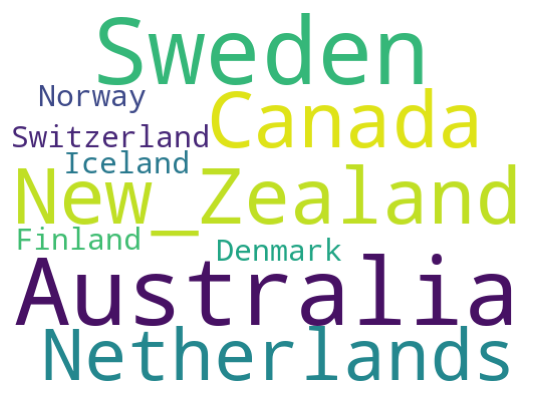

In [290]:
wordcloud = WordCloud(background_color='white',
                          width=512,
                          height=384)
wordcloud.generate(" ".join(happiest_2018))

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

In [291]:
happiest_2019 = top_2019.groupby('Score')['Country or region'].sum()

happiest_2019

Score
7.246        Austria
7.278         Canada
7.307    New_Zealand
7.343         Sweden
7.480    Switzerland
7.488    Netherlands
7.494        Iceland
7.554         Norway
7.600        Denmark
7.769        Finland
Name: Country or region, dtype: object

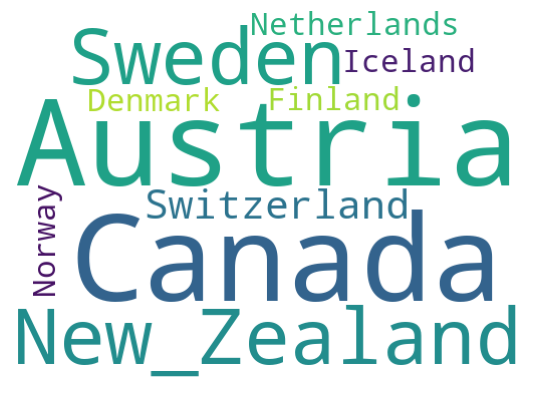

In [293]:
wordcloud = WordCloud(background_color='white',
                          width=512,
                          height=384)
wordcloud.generate(" ".join(happiest_2019))

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

FINAL CONSIDERATIONS

2018 and 2019 had almost the same countries in their top 10.

In 2018, GDP per capita, social support, and freedom to make life choices seem to have had an impact on the overall happiness score. They didn't affect the score individually, but appartently they did if combined all together.

The same goes for 2019, except that perception of corruption played a role too.

This analysis can give a broad idea on what might impact a country's overall level of happiness, but it comes with some limitations:

- The column 'Healthy life expectancy' had to be dropped due to its high volume in missing values. It would have been interesting to analyze that factor, since I consider it's a quite relevant one.

- The dataset didn't include factors such as the weather, LGBT rights, presence of infrastractures for disabled citizens, racism, healthcare system, bureaucracy, perception of job opportunities and professional growth, and other factors which might have an impact on an individual's personal happiness.

- Happiness is a quite complex and personal topic.

- It was impossible to come to a conclusion that is certain and we can only speculate based on the correlations that we found.

- We don't know how these data have been collected. The citizens' mood might have been affected by some internal or external factors and their score might have been biased. If a citizen had been robbed in the previous days, for example, their perception of corruption might have been biased.

- We don't know which type of people have been interviewed. Were they part of a minority group or did they belong to the privileged part of the population. This might have affected their overall score.